# Polymer Predition

-----------------------
## Context

Polymers are the essential building blocks of our world, from the DNA within our bodies to the plastics we use every day. They are key to innovation in critical fields like medicine, electronics, and sustainability. The search for the next generation of groundbreaking, eco-friendly materials is on, and machine learning can be the solution. However, progress has been stalled by one major hurdle: a critical lack of accessible, high-quality data.

University of Notre Dame's Open Polymer Prediction 2025 introduces a game-changing, large-scale open-source dataset – ten times larger than any existing resource. They invite participants to piece together the missing links and unlock the vast potential of sustainable materials.

Contributions have the potential to redefine polymer discovery, accelerating sustainable polymer research through virtual screening and driving significant advancements in materials science.

-----------------------
## Objective

The mission is to predict a polymer's real-world performance directly from its chemical structure. We'll be provided with a polymer's structure as a simple text string (SMILES), and our challenge is to build a model that can accurately forecast five key metrics that determine how it will behave. This includes predicting its density, its response to heat thermal conductivity(Tc) and glass transition temperature(Tg), and its fundamental molecular size and packing efficiency radius of gyration(Rg) and fractional free volume(FFV). The ground truth for this competition is averaged from multiple runs of molecular dynamics simulation. The evaluation metric for this contest is a weighted Mean Absolute Error (wMAE) as detailed on the competition website.

-----------------------
## Data Dictionary

This competition uses a hidden test set. When your submitted notebook is scored, the actual test data will be made available to your notebook. Expect approximately 1,500 polymers in the hidden test set.

**train.csv**

* id - Unique identifier for each polymer.
* SMILES - Sequence-like chemical notation of polymer structures.
* Tg - Glass transition temperature (Celcius) 
* FFV - Fractional free volume.
* Tc - Thermal conductivity (W/m*K).
* Density - Polymer density (g*cm^-3).
* Rg - Radius of gyration (A_bar).

**test.csv**

* id - Unique identifier for each polymer.
* SMILES - Sequence-like chemical notation of polymer structures.

**sample_submission.csv**

* A sample submission in the correct format.


**train_supplement**

* dataset1.csv - Tc data from the host’s older simulation results
* dataset2.csv - SMILES from this Tg table. We are only able to provide the list of SMILES.
* dataset3.csv - data from the host’s older simulation results
* dataset4.csv - data from the host’s older simulation results




## Domain Research

The target variables in our objective are: glass tranisiton temperature (Tg), Fractional free volume (FFV), Thermal conductivity (Tc), density, and radius of gyration (Rg).

Let's define most of our terms:

* The **glass transition temperature** of a polymer is the temperature at which an amorphous polymer moves from a hard or glassy state to a softer, often rubbery or viscous state ([What Is the Glass Transition Temperature (Tg) of a Polymer](https://blog.chasecorp.com/resin-designs/what-is-the-glass-transition-temperature-tg-of-a-polymer-and-why-does-it-matter-to-me#:~:text=One%20of%20the%20most%20common,often%20rubbery%20or%20viscous%20state.)).

* **Free volume** in a polymer is the space at the molecular scale that is not occupied by polymer chains. It is an inherent property of polymer matrices that is determined by the polymers’ irregular chain packing, molecular oscillations, topological constraints, etc., which in turn affects properties like glass transition, gas diffusion, and elastic stiffness ([Machine learning prediction on the fractional free volume of polymer membranes](https://www.sciencedirect.com/science/article/abs/pii/S0376738822008766)).

* **Thermal conductivity** is a measure with which heat flows through a material ([Thermal Conductivity](https://www.sciencedirect.com/topics/engineering/thermal-conductivity)).

* **Density** is self-explanatory.

* A **radius of gyration** in general is the distance from the center of mass of a body at which the whole mass could be concentrated without changing its moment of rotational inertia about an axis through the center of mass. For a polymer chain, this is also the root-mean-square distance of the segments of the molecule from its center of mass. ([Nanostructured Polymer Blends, 2014](https://www.sciencedirect.com/topics/engineering/radius-of-gyration#:~:text=For%20a%20polymer%20chain%2C%20this,in%20the%20amorphous%20bulk%20state.))


With this in mind, our goal is to predict these physical properties using nothing but machine learning and an understanding of the polymer's molecular structure. The SMILES sequence encodes a lot of useful information that encapsulates the 3D structure of our polymers, so it would be helpful to extract this in the course of our code.

What we need now are names of variables that are correlated to the target variables that we can feature extract using the SMILES sequences.

A major predictor of density, glass transition temperature, fractional free volume, and thermal conductivity is **polymer crystalinity** ([The Influence of the Degree of Crystallinity on the Glass Transition Temperature of Polymers](https://www.researchgate.net/publication/272007215_The_Influence_of_the_Degree_of_Crystallinity_on_the_Glass_Transition_Temperature_of_Polymers)) ([Crystallinity](https://www.doitpoms.ac.uk/tlplib/polymerbasics/crystallinity.php#:~:text=Crystallinity%20defines%20the%20degree%20of,molecules%20to%20pack%20closely%20together)) ([Effect of temperature and crystallinity on the thermal conductivity of semi-crystalline polymers: A case study of polyethylene](https://www.sciencedirect.com/science/article/abs/pii/S0254058422006319#:~:text=Generally%20speaking%2C%20the%20thermal%20conductivity,%2Ddensity%20polyethylene%20(LDPE).)) ([Relationship between free volume properties and structure of poly(3-hydroxybutyrate-co-3-hydroxyvalerate) membranes via various crystallization conditions](https://www.sciencedirect.com/science/article/abs/pii/S0032386109007927#:~:text=In%20previous%20studies%20%5B16%5D%2C%20%5B24%5D%2C%20%5B25%5D%2C%20the,decreased%20with%20an%20increasing%20amount%20of%20crystallinity.)).

It has been shown that: chain length, chain branching, interchain interactions, molecular weight, and processing conditions are all factors that affect crystalization. From our SMILES representations, we can extract the chain length, branching, and molecular weight data ([Polymer Crystallinity](https://chem.libretexts.org/Bookshelves/Organic_Chemistry/Organic_Chemistry_(Morsch_et_al.)/30%3A_Synthetic_Polymers/30.06%3A_Polymer_Structure_and_Physical_Properties#:~:text=Chain%20length:%20Longer%20polymer%20chains,forces%20between%20polymer%20chains%20increases.)). ([Unlocking Polymer Crystallinity Secrets](https://www.numberanalytics.com/blog/ultimate-guide-polymer-crystallinity#:~:text=Importance%20of%20Crystallinity%20in%20Determining,in%20improved%20toughness%20and%20flexibility.))

To dig deeper, let's examine stutied impacts on each pf our target physical properties:

* Molecular weight, chain length, presense of plasticzers, crystallinity, presense of pendant groups, and chain stiffness affect Glass transition temperature.  ([Polymer Glass Transition Temperature - Material Properties, Impact](https://hzo.com/blog/polymer-glass-transition-temperature-material-properties-impact#:~:text=Molecular%20weight%20and%20chain%20length,Tg%20values%20than%20crystalline%20polymers.)) ([Factors Influencing Tg](http://eng.libretexts.org/Bookshelves/Materials_Science/Polymer_Chemistry_(Whisnant)/08%3A_Transitions/8.02%3A_Factors_Influencing_Tg#:~:text=The%20value%20of%20Tg,from%20the%20C-Cl%20bond.)) Another study used QSPR methods and predicted glass transition temperature using the number of rotatable bonds, the dipole moment, the heat of formation, the HOMO eigenvalue, the molar mass and molar volume ([Predicting Glass Transition Temperatures of Polyarylethersulphones Using QSPR Methods](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0038424#:~:text=The%20technique%20of%20Quantitative%20Structure,substituents%20as%20the%20principal%20variable.))

* According to previous machine learning studies, van der Walls volume is correlated with the calculation for fractional free volume [Machine learning prediction on the fractional free volume of polymer membranes](https://www.sciencedirect.com/science/article/abs/pii/S0376738822008766?via%3Dihub). Of note in this study is a machine learning approach to fractional free volume that is incredibly robust.

* Factors that influence thermal conductivity include filler type, shape, distribution, and interfacial dynamics [Application of machine learning in predicting the thermal conductivity of single-filler polymer composites](https://www.sciencedirect.com/science/article/abs/pii/S2352492824010973).

* In addition to crystalinity, branching can affect the density of a polymer.

* The radius of gyration typically depends on the molecular weight of the polymer and how it's branched ([Radius of Gyration](https://www.sciencedirect.com/topics/engineering/radius-of-gyration)).


Taking all this into account, we will engineer the following features: **max chain Length, number of heavey and non ring branchs (bits that can catch like hooks on other polymers),  molecular weight, number of rotatable bonds, dipole moment, molar volume, van der walls volume, and number of rings**.



## Data Preprocessing

In [2]:
%pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Import Libraries
import numpy as np
import pandas as pd

#Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

#Chem Libraries
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import rdDistGeom
from rdkit.Chem.rdPartialCharges import ComputeGasteigerCharges

#Machine Learning Libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    StackingRegressor,
)
from xgboost import XGBRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR

#To tune model and other helpful model metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
import optuna
from skopt import BayesSearchCV


#Helpful Preprocessing
from sklearn.model_selection import train_test_split

#Suppress Warnings
from rdkit import RDLogger  
import warnings

RDLogger.DisableLog('rdApp.*') 
optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.simplefilter(action = "ignore", category = RuntimeWarning)



In [ ]:
#Reading our data
train_df = pd.read_csv('NeurIPS/train.csv')

df_1 = pd.read_csv('NeurIPS/train_supplement/dataset1.csv')
df_3 = pd.read_csv('NeurIPS/train_supplement/dataset3.csv')
df_4 = pd.read_csv('NeurIPS/train_supplement/dataset4.csv')

df_submission = pd.read_csv('NeurIPS/test.csv')



Note: There exist duplicate simulations. The train dataset is a sample of data collected from all of the supplements with the target values averaged. For example, in dataset1, the SMILES "*/C=C/*" is found twice with a TC_mean of 0.5260 and 0.2620. The same SMILES is found in train.csv and has a recorded "Tc" of 0.3940, the average of our two values. However, there exist some unique SMILES polymers that we can use to enhance our training. As such, we will start by cleaning these supplemental dataframes.

In [5]:
#Data cleaning the supplementary datasets.
df_1 = df_1.groupby('SMILES').mean().reset_index()
df_3 = df_3.groupby('SMILES').mean().reset_index()
df_4 = df_4.groupby('SMILES').mean().reset_index()

In [6]:
#Saving to a single dataframe
df = pd.merge(train_df, df_1, on='SMILES', how='outer')
df = pd.merge(df, df_3, on='SMILES', how='outer')
df = pd.merge(df, df_4, on='SMILES', how='outer')

In [7]:
print(df['SMILES'].duplicated().sum())

df.sample(10, random_state=64)

0


,id,SMILES,Tg_x,FFV_x,Tc,Density,Rg,TC_mean,Tg_y,FFV_y
4566,NaN,*Nc1ccc(*)cc1OCCCCCCCCCCOc1ccc(C2CCC(CCCCC)CC2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.383201
8125,1.489614e+09,*c1ccc(Oc2ccc(C(=O)c3ccc(-c4ccc(C(=O)c5ccc(Oc6...,NaN,0.404158,NaN,NaN,NaN,NaN,NaN,NaN
4805,NaN,*Nc1ccc(/C(C)=C/C(C)(C)c2ccc(N*)cc2)cc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.355009
2166,1.877302e+09,*CC(C)(C)COC(=O)NC(=O)c1ccc(C(=O)NC(=O)O*)cc1,NaN,0.312651,NaN,NaN,NaN,NaN,NaN,NaN
4951,2.006514e+09,*Nc1ccc(C(c2ccc(N*)cc2)[C@@H](CCC)[C@H]2CC[C@H...,NaN,0.378034,NaN,NaN,NaN,NaN,NaN,NaN
7901,9.245841e+08,*c1ccc(N(c2ccc(C#N)cc2)c2ccc(N3C(=O)c4ccc(Oc5c...,NaN,0.393344,NaN,NaN,NaN,NaN,NaN,NaN
8837,4.898240e+08,*c1cccc(N2C(=O)c3ccc(Oc4c(C)cc(Cc5cc(C)c(Oc6cc...,NaN,0.391093,NaN,NaN,NaN,NaN,NaN,NaN
8091,5.310212e+08,*c1ccc(Oc2ccc(-c3cnc4ccc(-c5ccc6nc(*)cnc6c5)cc...,NaN,0.400009,NaN,NaN,NaN,NaN,NaN,NaN
8543,1.722899e+09,*c1ccc2c(c1)C(=O)N(c1cc(C(=O)Oc3ccc(C(c4ccc(OC...,NaN,0.369971,NaN,NaN,NaN,NaN,NaN,NaN
2997,NaN,*CCCCCCCCCCOc1ccc(C=Cc2ccc(OCCCCCCCCCCOP(=O)(O...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.374166


In [8]:
#Cleaning up the duplicate columns

#Making single 'Tg' column
df['Tg'] = df.apply(lambda x: x['Tg_y'] if pd.isnull(x['Tg_x']) else x['Tg_x'], axis=1)

#Making single 'FFV' column
df['FFV'] = df.apply(lambda x: x['FFV_y'] if pd.isnull(x['FFV_x']) else x['FFV_x'], axis=1)

#Making single 'Tc' column
df['Tc'] = df.apply(lambda x: x['TC_mean'] if pd.isnull(x['Tc']) else x['Tc'], axis=1)

In [9]:
#Dropping and reorginizing columns
df.drop(['Tg_x', 'Tg_y', 'FFV_x', 'FFV_y', 'TC_mean'], axis=1, inplace=True)

df = df[['id', 'SMILES', 'Tg', 'FFV', 'Tc', 'Density', 'Rg']]

df.head()

,id,SMILES,Tg,FFV,Tc,Density,Rg
0,2.180595e+08,*/C(=C(/*)c1ccccc1)c1ccccc1,206.569886,NaN,NaN,NaN,NaN
1,NaN,*/C(=C(\c1ccccc1)c1ccc(*)cc1)c1ccccc1,NaN,NaN,0.3380,NaN,NaN
2,3.824205e+07,*/C(F)=C(\F)C(F)(C(*)(F)F)C(F)(F)F,NaN,NaN,0.1020,NaN,NaN
3,6.868332e+08,*/C=C(/*)C#CCCCCCCCCCCCCCCCCCCCCC(=O)O,NaN,NaN,0.4105,0.885737,15.064002
4,1.620933e+09,*/C=C(/*)CCCCCCCCCCCCCCCCCCCCC(=O)O,NaN,NaN,0.4030,0.868464,14.078555


Great! Now let's clean this a little more. In our supplementary datasets, it's possible that some of the new SMILES are just different representations of other values. We will look for this by converting all SMILES to their canonical SMILES format.

In [10]:
can_smiles = []
for smile in df['SMILES']:
    mol = Chem.MolFromSmiles(smile)
    can_smiles.append(Chem.MolToSmiles(mol))
    
df['SMILES'] = can_smiles


can_smiles = []
for smile in df_submission['SMILES']:
    mol = Chem.MolFromSmiles(smile)
    can_smiles.append(Chem.MolToSmiles(mol))

df_submission['SMILES'] = can_smiles


Let's check for dupes now.

In [11]:
print(df['SMILES'].duplicated().sum())

2


Since there are dupes, let's take a look at them.

In [12]:
df[df['SMILES'].duplicated(keep=False)]

,id,SMILES,Tg,FFV,Tc,Density,Rg
2503,NaN,*CC1(C)CC(N2C(=O)c3ccc(-c4ccc5c(c4)C(=O)N(*)C5...,NaN,0.374658,NaN,NaN,NaN
8968,NaN,*CC1(C)CC(N2C(=O)c3ccc(-c4ccc5c(c4)C(=O)N(*)C5...,NaN,NaN,0.231,NaN,NaN
8972,NaN,*c1ccc(Oc2ccc(Oc3ccc(-c4nc5cc(C(c6ccc7oc(*)nc7...,NaN,NaN,0.176,NaN,NaN
8973,NaN,*c1ccc(Oc2ccc(Oc3ccc(-c4nc5cc(C(c6ccc7oc(*)nc7...,NaN,NaN,0.155,NaN,NaN


We have two duplicate SMILES. Let's fix that.

In [13]:
df.at[2503, 'Tc'] = df.at[8968, 'Tc']

df.at[8972, 'Tc'] = np.mean([df.at[8972, 'Tc'], df.at[8973, 'Tc']])

df.drop_duplicates(subset='SMILES', inplace=True)

In [14]:
df.head()

,id,SMILES,Tg,FFV,Tc,Density,Rg
0,2.180595e+08,*/C(=C(/*)c1ccccc1)c1ccccc1,206.569886,NaN,NaN,NaN,NaN
1,NaN,*/C(=C(\c1ccccc1)c1ccc(*)cc1)c1ccccc1,NaN,NaN,0.3380,NaN,NaN
2,3.824205e+07,*/C(F)=C(\F)C(F)(C(*)(F)F)C(F)(F)F,NaN,NaN,0.1020,NaN,NaN
3,6.868332e+08,*/C=C(/*)C#CCCCCCCCCCCCCCCCCCCCCC(=O)O,NaN,NaN,0.4105,0.885737,15.064002
4,1.620933e+09,*/C=C(/*)CCCCCCCCCCCCCCCCCCCCC(=O)O,NaN,NaN,0.4030,0.868464,14.078555


In [15]:
df.describe()

,id,Tg,FFV,Tc,Density,Rg
count,7.973000e+03,557.000000,7892.000000,866.000000,613.000000,614.000000
mean,1.080050e+09,99.693183,0.367007,0.256644,0.985484,16.419787
std,6.218241e+08,111.075991,0.029067,0.101281,0.146189,4.608640
min,8.781700e+04,-148.029738,0.226992,0.046500,0.748691,9.728355
25%,5.376641e+08,17.013426,0.349598,0.186375,0.890243,12.540328
50%,1.079079e+09,77.846783,0.364004,0.236000,0.948193,15.052194
75%,1.621708e+09,164.863901,0.380173,0.325000,1.062096,20.411067
max,2.147438e+09,472.250000,0.777097,1.590000,1.840999,34.672906


* Tg has a large range from the low temperature of -148 C to a high of 472 C with a large standard deviation.

* FFV seems to hover around 0.36 without moving roo much, but has at least one outlier around 0.03 and 0.78.

* Tc has an extreme value of 1.59 and seems to hover around 0.26.

* Density is hovering around 0.99 with an extreme value of 1.84.

* Rg seems relatively packed around 15.05 with a small outlier at 34.67.

Now let's take a look at our polymers.

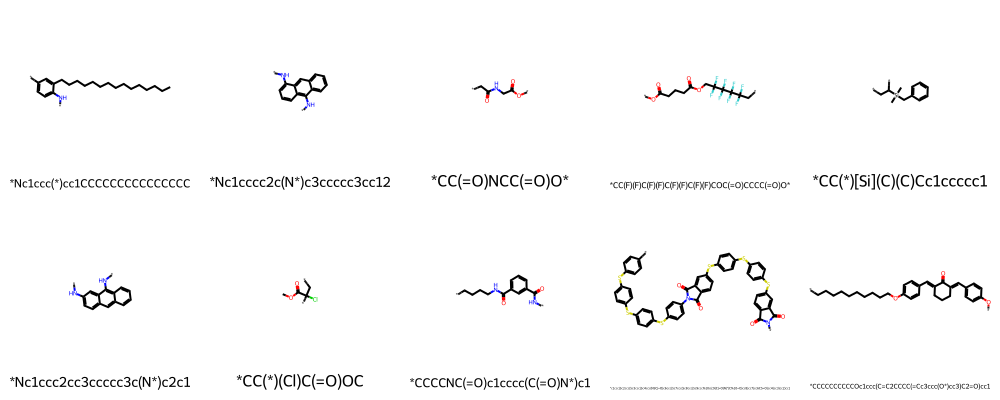

In [16]:
# Randomly sample 10 SMILES
sample_smiles = df['SMILES'].sample(10, random_state=64).to_list()

# Convert SMILES to RDKit Mol objects
mols = [Chem.MolFromSmiles(smi) for smi in sample_smiles]

# Draw and display molecules inline
Draw.MolsToGridImage(
    mols,
    molsPerRow=5,
    subImgSize=(200, 200),
    legends=[f"{sample_smiles[i]}" for i in range(len(sample_smiles))]
)

In [17]:
df_submission.head()

,id,SMILES
0,1109053969,*Oc1ccc(C=NN=Cc2ccc(Oc3ccc(C(c4ccc(*)cc4)(C(F)...
1,1422188626,*Oc1ccc(C(C)(C)c2ccc(Oc3ccc(C(=O)c4cccc(C(=O)c...
2,2032016830,*c1cccc(OCCCCCCCCOc2cccc(N3C(=O)c4ccc(-c5cccc6...


## Feature Engineering

In [18]:
#Creating a molecular weight column
#df['MW'] = df.apply(lambda x: Descriptors.ExactMolWt(Chem.MolFromSmiles(x['SMILES'])), axis=1)
#df_submission['MW'] = df_submission.apply(lambda x: Descriptors.ExactMolWt(Chem.MolFromSmiles(x['SMILES'])), axis=1)

In [19]:
#This function finds the number of rings and number of what I call "heavy branches".
#Heavy branches are branches counting loops as one unit and hydrogens as 0.
def analyze_rings(SMILE):
    
    mol = Chem.MolFromSmiles(SMILE)
    
    def rewire_neighbors(ring, rw_mol):
        
        ring_set = ring.get('atoms')
        
        for atom in ring_set:
            for neighbor in rw_mol.GetAtomWithIdx(atom).GetNeighbors():
                if neighbor.GetIdx() not in ring_set:
                    rw_mol.RemoveBond(atom, neighbor.GetIdx())
                    if rw_mol.GetBondBetweenAtoms(neighbor.GetIdx(), ring.get('dummy_idx')) is None:
                        rw_mol.AddBond(neighbor.GetIdx(), ring.get('dummy_idx'))
            if atom not in atoms_to_remove:
                atoms_to_remove.append(atom)
                        
        return rw_mol
    
    
    
    #We will be modifying a molecular diagram
    rw_mol = Chem.RWMol(mol)
    
    # 1. Identify rings and atoms in rings
    ring_info = rw_mol.GetRingInfo()
    atom_rings = ring_info.AtomRings()
    atoms_to_remove = []
    
    num_rings = ring_info.NumRings()
    
    
    # 2. Create a dummy carbon atom for each ring and store mapping
    ring_to_dummy = []
    
    for i, ring in enumerate(atom_rings):
        dummy_atom = Chem.Atom('C')  # Use dummy carbon atom
        dummy_idx = rw_mol.AddAtom(dummy_atom)
        ring_to_dummy.append({'atoms': set(ring),'dummy_idx': dummy_idx})
    
    # 3. For each non-ring neighbor, rewire their bond to the cooresponding carbon atom for each ring
    for ring in ring_to_dummy:
        rw_mol = rewire_neighbors(ring, rw_mol)
    
    # 4. Remove rings
    for idx in sorted(atoms_to_remove, reverse=True):
        rw_mol.RemoveAtom(idx)
    
    
    # 5. Count Heavy Neighbors
    branch_count = 0

    for atom in rw_mol.GetAtoms():
        neighbors = atom.GetNeighbors()
        heavy_neighbors = len([n for n in neighbors if n.GetAtomicNum() > 1])
        
        if heavy_neighbors > 2:
            branch_count += heavy_neighbors - 2
    
    
        
    return [num_rings, branch_count]

    

In [20]:
#df[['NRings', 'HBranches']] = df['SMILES'].apply(analyze_rings).to_list()
#df_submission[['NRings', 'HBranches']] = df_submission['SMILES'].apply(analyze_rings).to_list()

In [21]:
df.head()

,id,SMILES,Tg,FFV,Tc,Density,Rg
0,2.180595e+08,*/C(=C(/*)c1ccccc1)c1ccccc1,206.569886,NaN,NaN,NaN,NaN
1,NaN,*/C(=C(\c1ccccc1)c1ccc(*)cc1)c1ccccc1,NaN,NaN,0.3380,NaN,NaN
2,3.824205e+07,*/C(F)=C(\F)C(F)(C(*)(F)F)C(F)(F)F,NaN,NaN,0.1020,NaN,NaN
3,6.868332e+08,*/C=C(/*)C#CCCCCCCCCCCCCCCCCCCCCC(=O)O,NaN,NaN,0.4105,0.885737,15.064002
4,1.620933e+09,*/C=C(/*)CCCCCCCCCCCCCCCCCCCCC(=O)O,NaN,NaN,0.4030,0.868464,14.078555


In [22]:
#df['numRotate'] = df.apply(lambda x: rdMolDescriptors.CalcNumRotatableBonds(Chem.MolFromSmiles(x['SMILES'])), axis=1)
#df_submission['numRotate'] = df_submission.apply(lambda x: rdMolDescriptors.CalcNumRotatableBonds(Chem.MolFromSmiles(x['SMILES'])), axis=1)

rdMolDescriptors.GetVDWVolume(mol)

In [23]:
#This function 
def analyze_3D(SMILE):

    vdw_volume = np.nan
    dipole_moment = np.nan
    

    
    #Generate mol from SMILE
    mol = Chem.MolFromSmiles(SMILE)
    
    for atom in mol.GetAtoms():
        if atom.GetSymbol() == '*':
            atom.SetAtomicNum(1)  # Replace dummy with hydrogen
    
    mol = Chem.AddHs(mol)
    
    try:
        #Generate conformer 
        conformer = rdDistGeom.EmbedMolecule(mol, useBasicKnowledge=False)
        

        # Compute volume
        vdw_volume = rdMolDescriptors.DoubleCubicLatticeVolume(mol).GetVDWVolume()
        
        ComputeGasteigerCharges(mol)
        dipole_vector = np.zeros(3)
        conf = mol.GetConformer()
        
        for atom in mol.GetAtoms():
            idx = atom.GetIdx()
            
            try:
                charge = float(atom.GetProp('_GasteigerCharge'))
            except Exception:
                charge = 0
            
            pos = conf.GetAtomPosition(idx)
            r = np.array([pos.x, pos.y, pos.z])
            dipole_vector += charge * r

        # Convert e·Å to Debye: 1 e·Å ≈ 4.8032 Debye
        dipole_moment = np.linalg.norm(dipole_vector) * 4.80320  
    except TimeoutError as e:
        print(e)
    finally:
        return [vdw_volume, dipole_moment]

    
    

In [24]:
#df[['VDWV', 'DM']] = df['SMILES'].apply(analyze_3D).to_list()
#df_submission[['VDWV', 'DM']] = df_submission['SMILES'].apply(analyze_3D).to_list()

Lastly, we want to calculate the length of the longest path in a polymer. The following code accomplishes this.

In [25]:
# Code credit goes to [Brian Kelley](https://github.com/bp-kelley)

def _dfs(bond, atom, visited, path, longest):
    """Depth first search to find the longest path from an atom
    Args:
       bond:  the bond we are traversing (None for the first atom)
       atom: the atom we are traversing to
       visited: set of atom indices we have seen on the this path
       path: The list of [(from_bond, to_atom), ...] alreadh in the path
       longest: holds the longest path found so far
    """
    path.append((bond, atom))
    visited.add(atom.GetIdx())
    if not longest or len(path) > len(longest[0]):
        longest.clear()
        longest.append( path.copy() )

    for bond in atom.GetBonds():
        nbr = bond.GetOtherAtom(atom)
        if nbr.GetIdx() not in visited:
            _dfs(bond, nbr, visited, path, longest)

            path.pop()
            visited.remove(nbr.GetIdx())
            
            
def longest_path(SMILE):
    """Start at any atom (a), go to the atom farthest from that atom (b)
    And then find the atom farthest from (b).  This path is the longest path
    Args:
      mol: the molecule to search
      
    Returns:
       [atom indices for atoms in the longest path], pbond indices for bonds in the longest path]
    """
    
    #Generate mol from SMILE
    mol = Chem.MolFromSmiles(SMILE) 
    
    for atom in mol.GetAtoms():
        # go to the farthest atom
        visited, path, longest = set(), [], []
        _dfs(None, atom, visited, path, longest)
        
        # from the farthest atom, go to the farthest atom from it
        visited, path, longest = set(), [], []
        _dfs(None, atom, visited, path, longest)
        
        # this is the longest path, return
        bond_path = [b.GetIdx() for b,_ in longest[0] if b is not None]
        return len(bond_path)

In [26]:
#df['Longest_Path_Length'] = df['SMILES'].apply(longest_path)
#df_submission['Longest_Path_Length'] = df_submission['SMILES'].apply(longest_path)

## Exploratory Data Analysis

In [ ]:
df = pd.read_csv('NeurIPS/processed_train.csv')

df_submission = pd.read_csv('NeurIPS/processed_test.csv')

df.head()

,id,SMILES,Tg,FFV,Tc,Density,Rg,MW,NRings,HBranches,numRotate,MV,VDWV,DM,Longest_Path_Length
0,2.180595e+08,*/C(=C(/*)c1ccccc1)c1ccccc1,206.569886,NaN,NaN,NaN,NaN,178.078250,2,0,2,530.918990,192.348824,0.274766,8
1,NaN,*/C(=C(\c1ccccc1)c1ccc(*)cc1)c1ccccc1,NaN,NaN,0.3380,NaN,NaN,254.109550,3,1,3,686.585256,265.245076,0.290649,8
2,3.824205e+07,*/C(F)=C(\F)C(F)(C(*)(F)F)C(F)(F)F,NaN,NaN,0.1020,NaN,NaN,211.987226,0,6,2,373.504315,126.082610,3.560530,5
3,6.868332e+08,*/C=C(/*)C#CCCCCCCCCCCCCCCCCCCCCC(=O)O,NaN,NaN,0.4105,0.885737,15.064002,374.318481,0,1,20,1073.254376,397.422035,1.761690,26
4,1.620933e+09,*/C=C(/*)CCCCCCCCCCCCCCCCCCCCC(=O)O,NaN,NaN,0.4030,0.868464,14.078555,350.318481,0,1,21,1007.080357,369.490992,1.430249,24


In [28]:
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8972 entries, 0 to 8971
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7973 non-null   float64
 1   SMILES               8972 non-null   object 
 2   Tg                   557 non-null    float64
 3   FFV                  7892 non-null   float64
 4   Tc                   866 non-null    float64
 5   Density              613 non-null    float64
 6   Rg                   614 non-null    float64
 7   MW                   8972 non-null   float64
 8   NRings               8972 non-null   int64  
 9   HBranches            8972 non-null   int64  
 10  numRotate            8972 non-null   int64  
 11  MV                   8883 non-null   float64
 12  VDWV                 8883 non-null   float64
 13  DM                   8859 non-null   float64
 14  Longest_Path_Length  8972 non-null   int64  
dtypes: float64(10), int64(4), object(1)
me

id                      999
SMILES                    0
Tg                     8415
FFV                    1080
Tc                     8106
Density                8359
Rg                     8358
MW                        0
NRings                    0
HBranches                 0
numRotate                 0
MV                       89
VDWV                     89
DM                      113
Longest_Path_Length       0
dtype: int64

In [29]:
df['id'] = df['id'].astype(object)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8972 entries, 0 to 8971
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7973 non-null   object 
 1   SMILES               8972 non-null   object 
 2   Tg                   557 non-null    float64
 3   FFV                  7892 non-null   float64
 4   Tc                   866 non-null    float64
 5   Density              613 non-null    float64
 6   Rg                   614 non-null    float64
 7   MW                   8972 non-null   float64
 8   NRings               8972 non-null   int64  
 9   HBranches            8972 non-null   int64  
 10  numRotate            8972 non-null   int64  
 11  MV                   8883 non-null   float64
 12  VDWV                 8883 non-null   float64
 13  DM                   8859 non-null   float64
 14  Longest_Path_Length  8972 non-null   int64  
dtypes: float64(9), int64(4), object(2)
mem

In [31]:
#Takes an arbitrary amount of numeric dataframe columns and creates pairs of boxplots+histograms arranged in at most three columns.
def numericUA(dFrame, bins = "auto"):

  ncols = len(dFrame.columns)
  nsets = (ncols-1) // 3 + 1

  f, aplot = plt.subplots(

    nrows = 2*nsets,
    ncols=  min(3, ncols),
    height_ratios=(.25, .75)*nsets,
    figsize = (18, 10*nsets)
  )

  #Turns off axis' by default so that there are no blank plots
  for a in aplot.flatten():
      a.axis("off")

  colIndex = 0

  #Iterates through each column and creates both the box plot and histogram in their correct positions
  for col in dFrame.columns:
    sns.boxplot(x = dFrame[col], ax=aplot[2*(colIndex // 3), colIndex % 3], showmeans=True, color = 'orange')

    sns.histplot(x = dFrame[col], ax = aplot[2*(colIndex // 3) + 1, colIndex % 3], kde=False, bins = bins)

    #Creates mean line
    aplot[2*(colIndex // 3)+1, colIndex % 3].axvline(np.mean(dFrame[col]), color='g', linestyle='--')

    #Creates median line
    aplot[2*(colIndex // 3)+1, colIndex % 3].axvline(np.median(dFrame[col]), color='black', linestyle='-')

    #If a plot exists, turns on axis'
    aplot[2*(colIndex // 3), colIndex % 3].set_axis_on()
    aplot[2*(colIndex // 3)+1, colIndex % 3].set_axis_on()

    colIndex += 1


  plt.show()

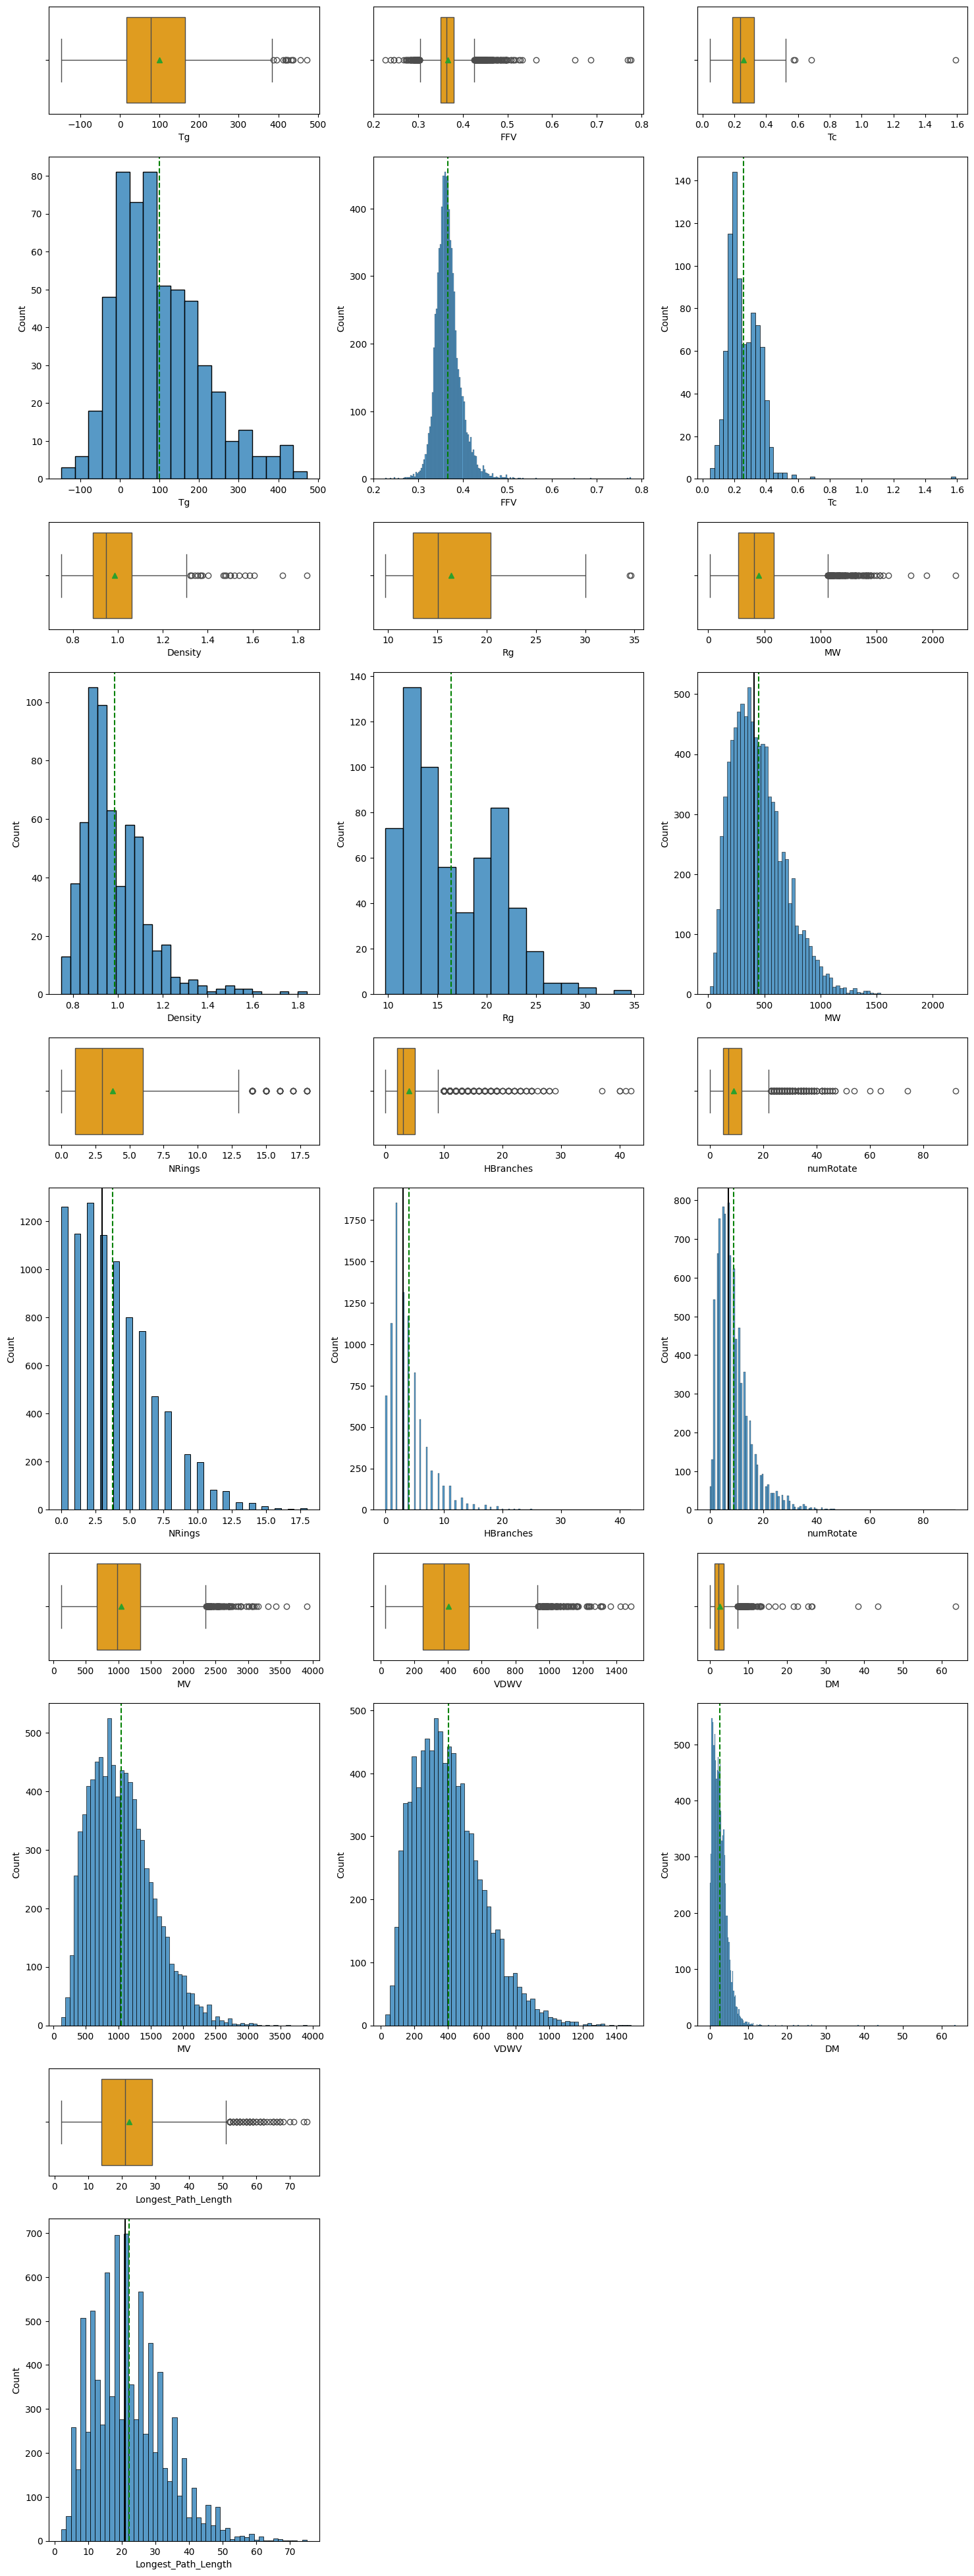

In [32]:
numericUA(df.select_dtypes(include='number'))

In [33]:
df[df['Tc'] > 1.0]

,id,SMILES,Tg,FFV,Tc,Density,Rg,MW,NRings,HBranches,numRotate,MV,VDWV,DM,Longest_Path_Length
8750,NaN,*c1ccc2cc(*)ccc2c1,NaN,NaN,1.59,NaN,NaN,126.04695,2,0,0,379.436841,134.390597,0.621347,10


In [34]:
#Removing abnormally high Tc
df.drop(index=8750, axis=0, inplace=True)

In [35]:
df[df['DM'] > 30]

,id,SMILES,Tg,FFV,Tc,Density,Rg,MW,NRings,HBranches,numRotate,MV,VDWV,DM,Longest_Path_Length
1181,1832968600.0,*CC(*)(C)C(=O)OCCCCCCCCCCCCCCCC[n+]1ccc(N(C)C)cc1,NaN,0.379092,NaN,NaN,NaN,431.363205,1,3,20,1210.774794,449.101158,38.396806,26
2842,686526509.0,*CCCCCCCCCCCCCCCC[N+](C)(C)CCCCCC[N+](*)(C)C,NaN,NaN,0.408,0.872184,20.265051,396.443253,0,3,23,1155.347071,431.651726,63.572046,25
3643,612139638.0,*CCN(CCOC(=O)Nc1ccc(C)c(NC(=O)O*)c1)c1ccc(C=Cc...,NaN,0.358146,NaN,NaN,NaN,515.265282,3,4,13,1284.444114,487.689631,43.451289,17


In [36]:
#Removing abnormally high DM
df.drop(index=[2842, 3643], axis=0, inplace=True)

In [37]:
df[df['numRotate'] > 60]

,id,SMILES,Tg,FFV,Tc,Density,Rg,MW,NRings,HBranches,numRotate,MV,VDWV,DM,Longest_Path_Length
79,1504763552.0,*C#CC(Cn1c2ccc(CCCCCCCCCCCCCCCC)cc2c2cc(CCCCCC...,-2.237818,NaN,NaN,NaN,NaN,1305.164253,6,7,64,NaN,NaN,NaN,33
82,980966583.0,*C#Cc1cc(OC(COCCOCCOCCOC)COCCOCCOCCOC)c(C#Cc2c...,-43.360512,NaN,NaN,NaN,NaN,1448.656431,2,7,74,NaN,NaN,NaN,29
4081,401549184.0,*N=P(*)(OCCOCCOCCOP1(OCCOCCOC)=NP(OCCOCCOC)(OC...,NaN,0.348179,NaN,NaN,NaN,1801.693159,2,9,92,3909.056,1454.480871,15.239275,25


In [38]:
#Removing abnormally high DM
df.drop(index=[4081], axis=0, inplace=True)

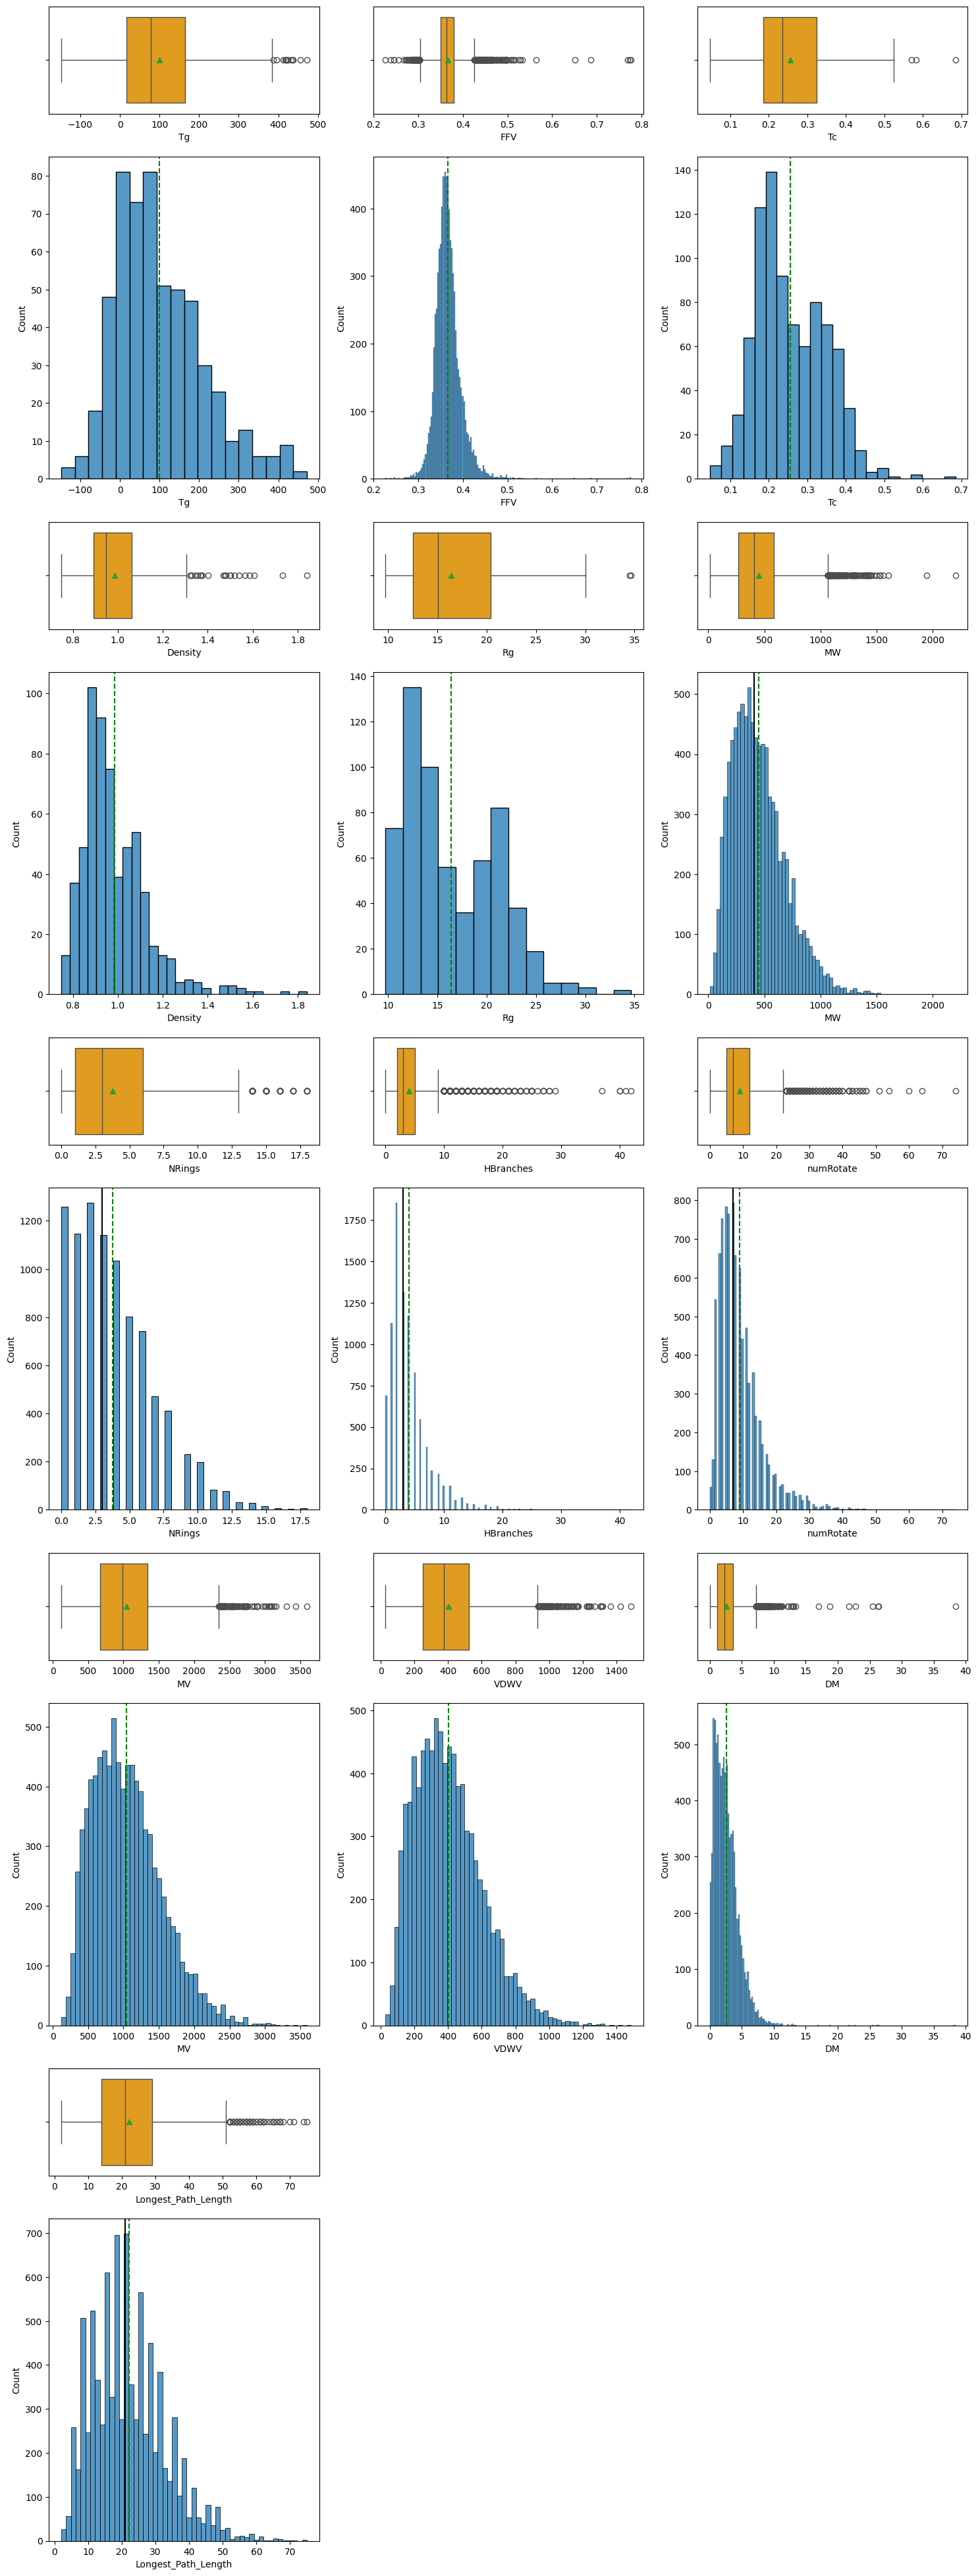

In [39]:
numericUA(df.select_dtypes(include='number'))

In [40]:
df.drop(['id', 'SMILES'], axis=1, inplace=True)

In [41]:
targets = ['Tg', 'FFV', 'Tc', 'Density', 'Rg']
features = ['MW', 'NRings', 'HBranches', 'numRotate', 'MV', 'VDWV', 'DM', 'Longest_Path_Length']

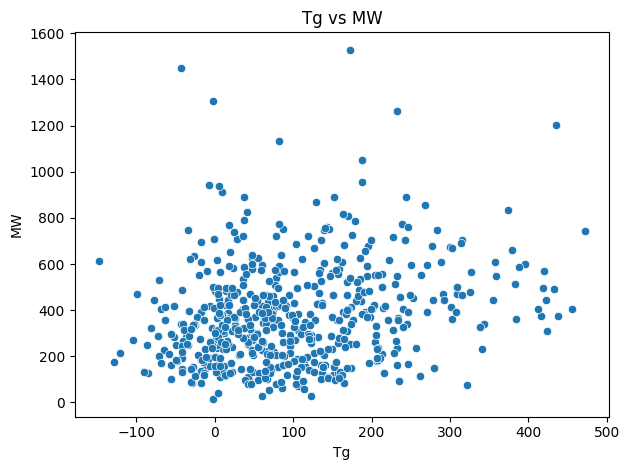

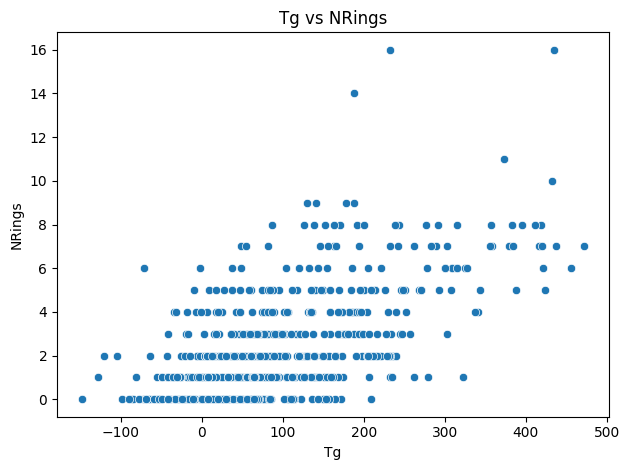

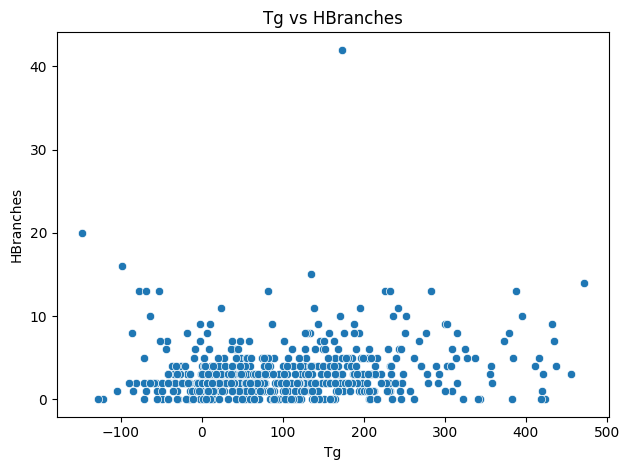

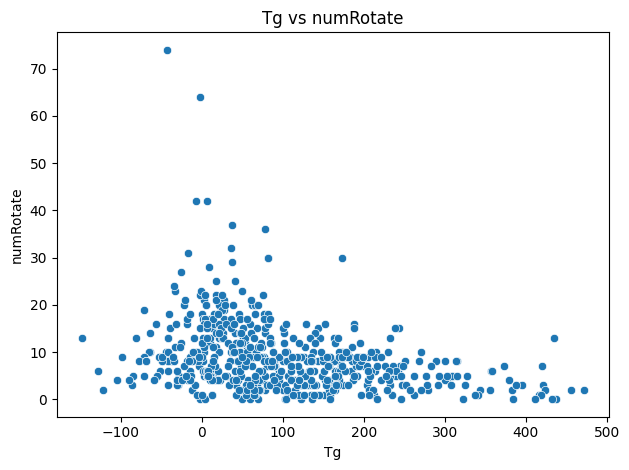

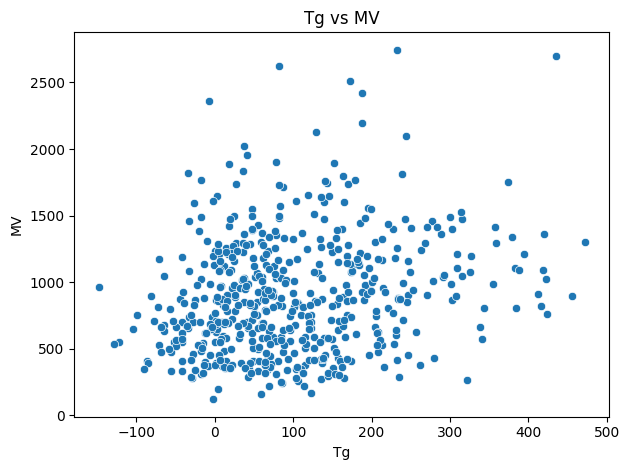

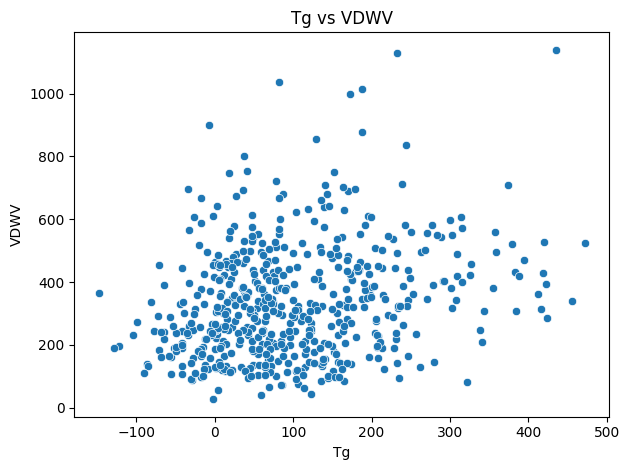

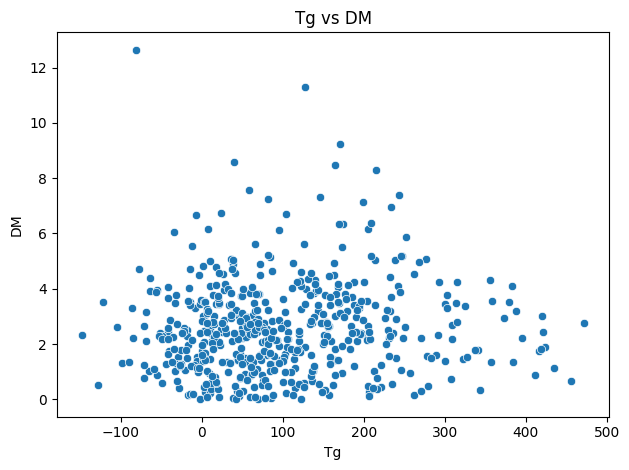

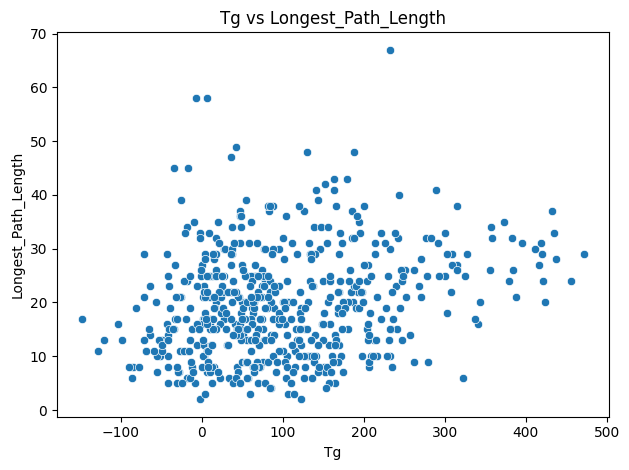

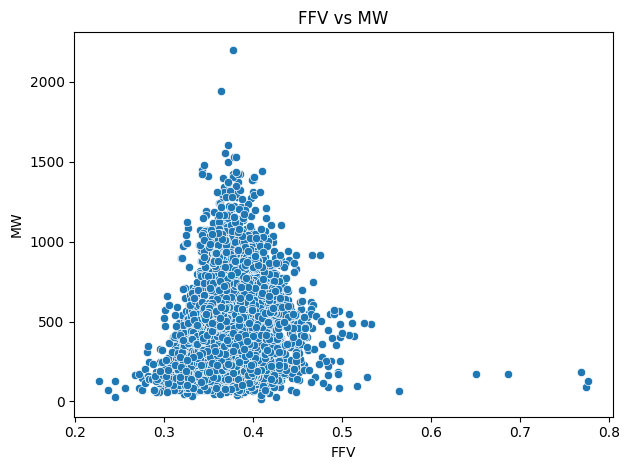

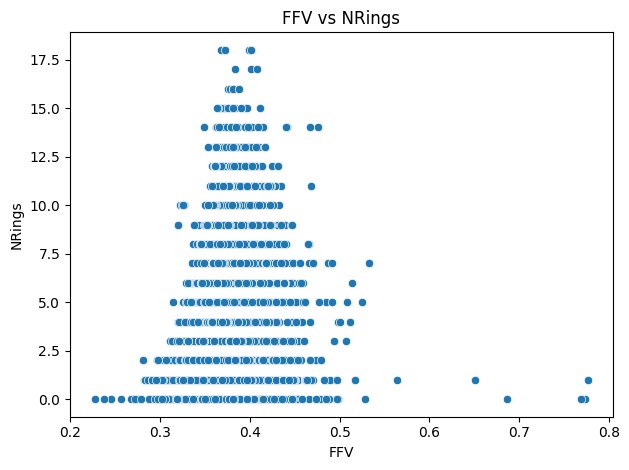

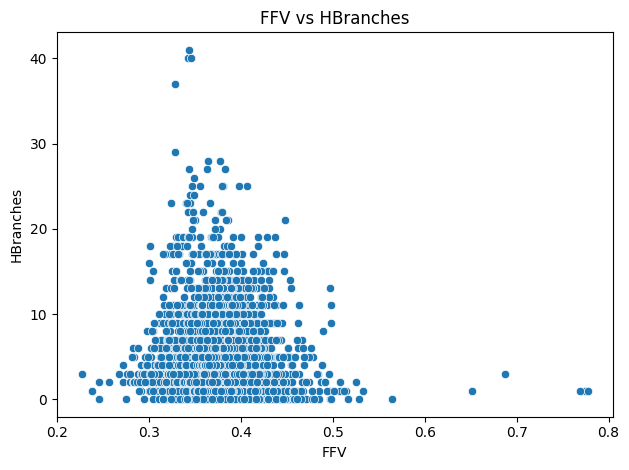

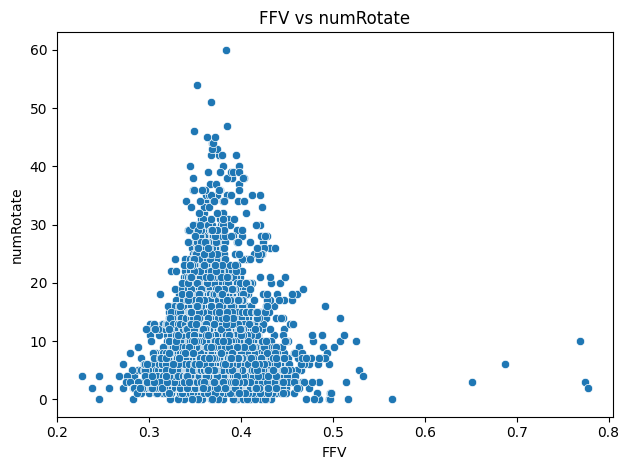

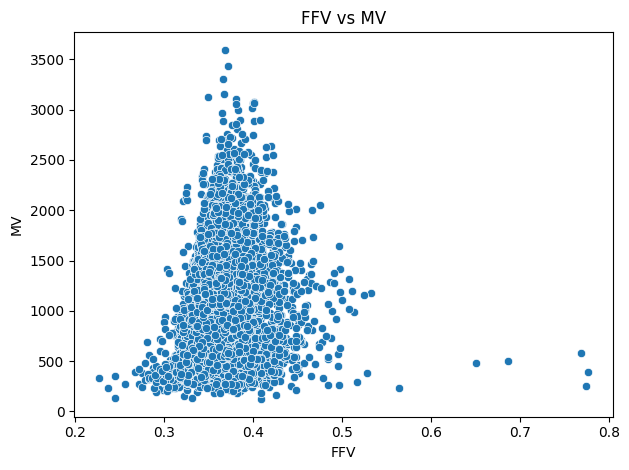

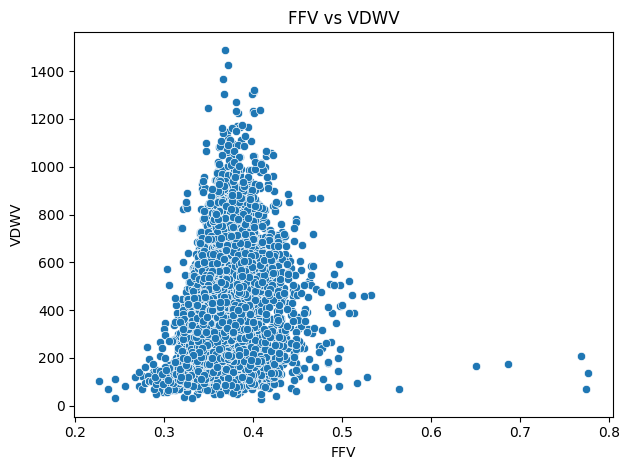

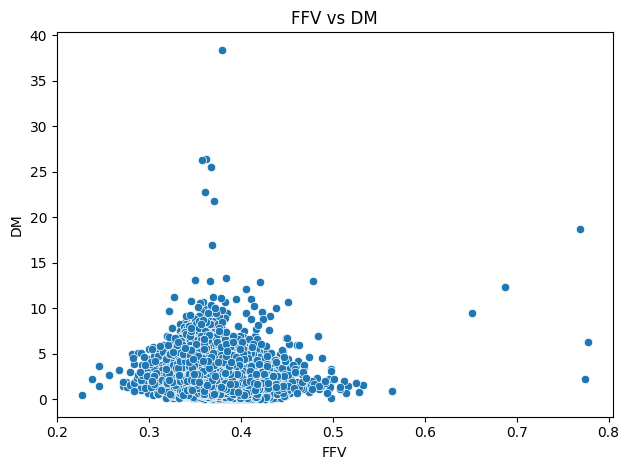

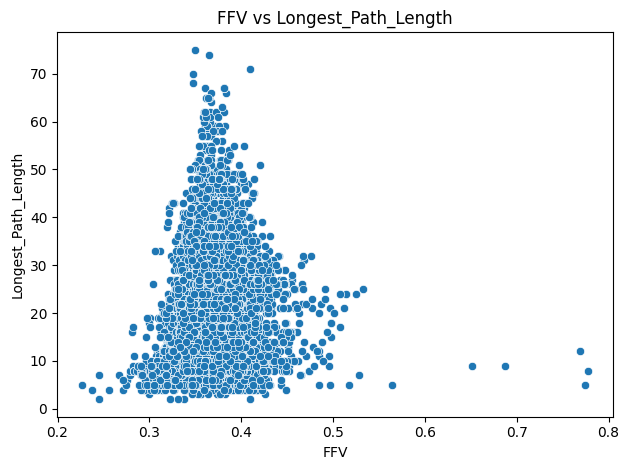

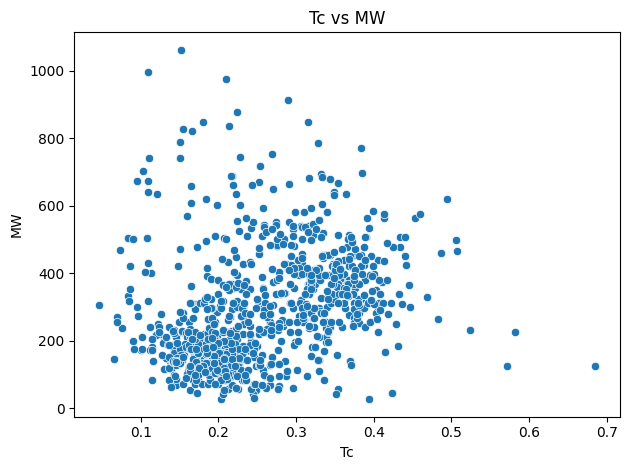

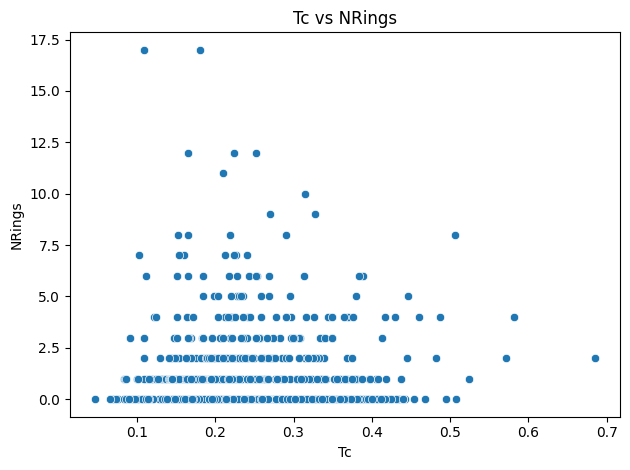

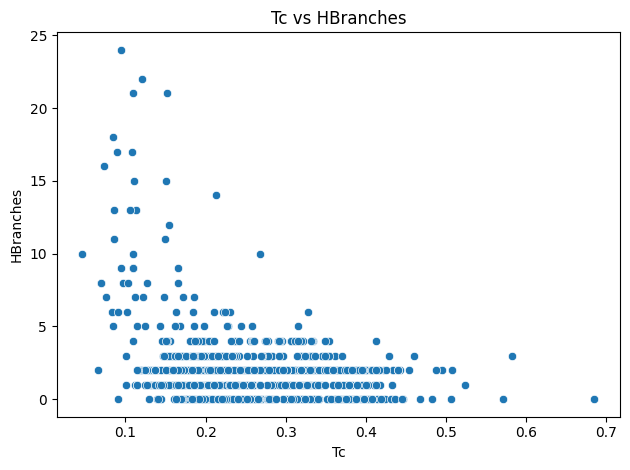

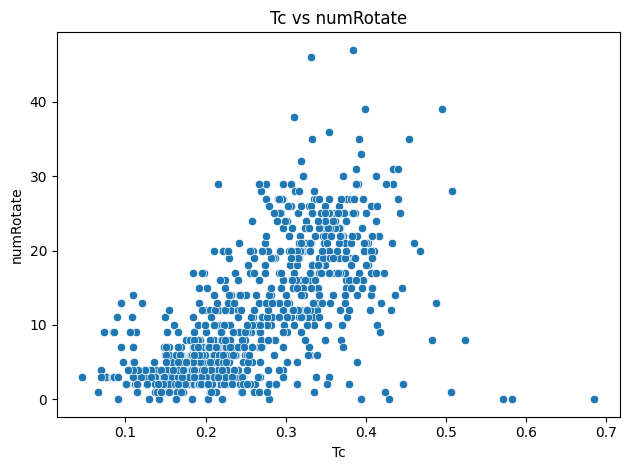

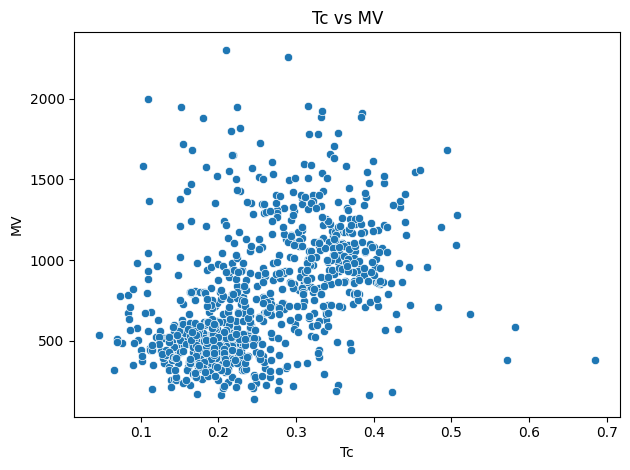

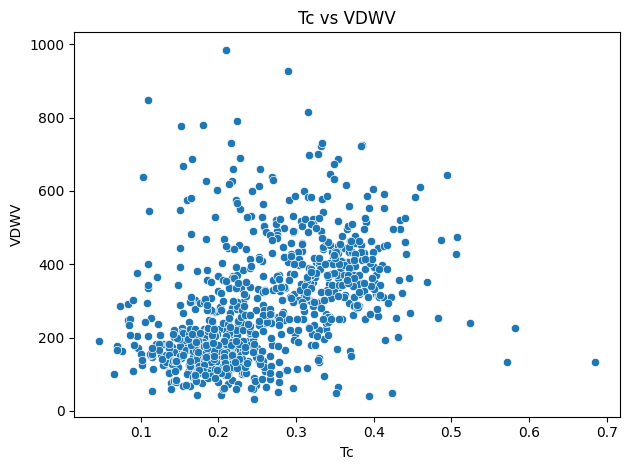

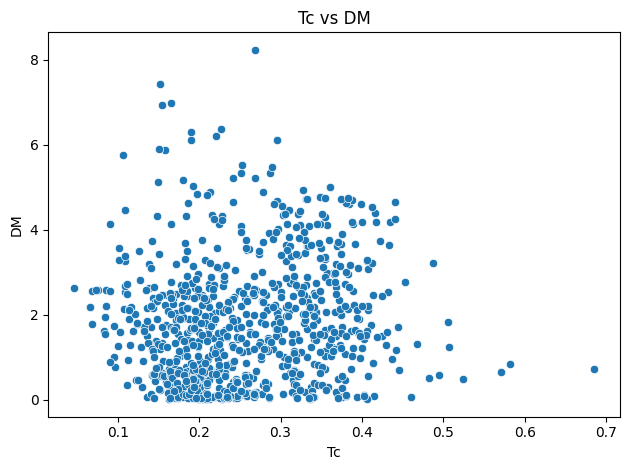

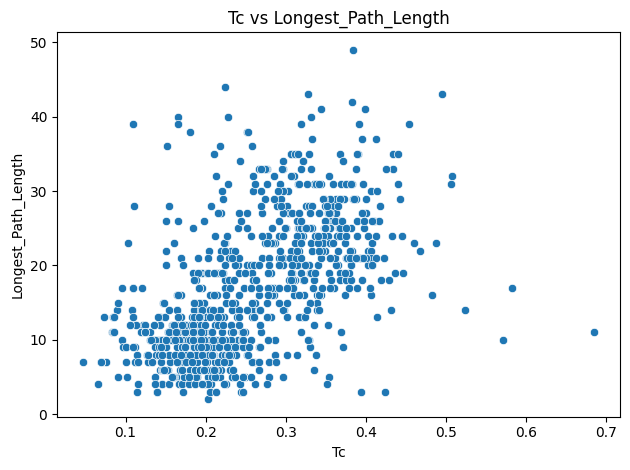

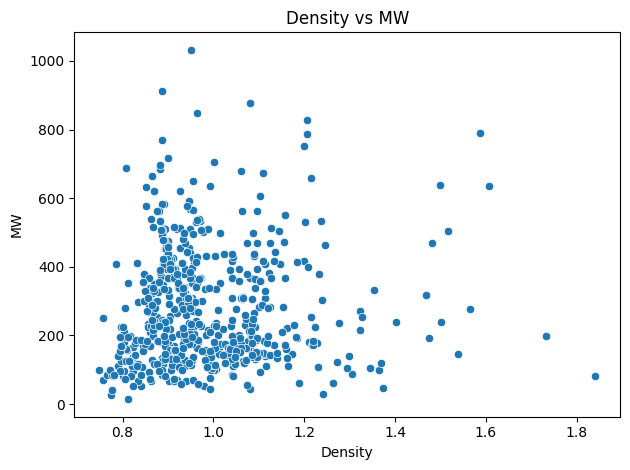

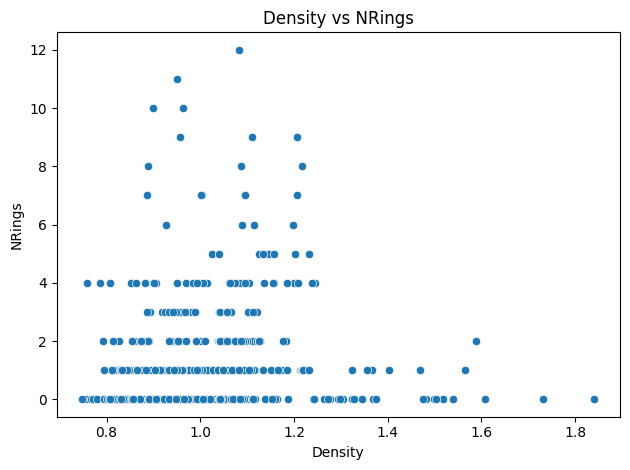

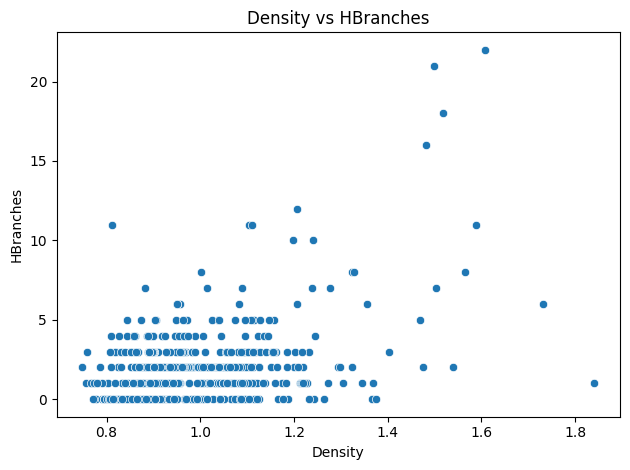

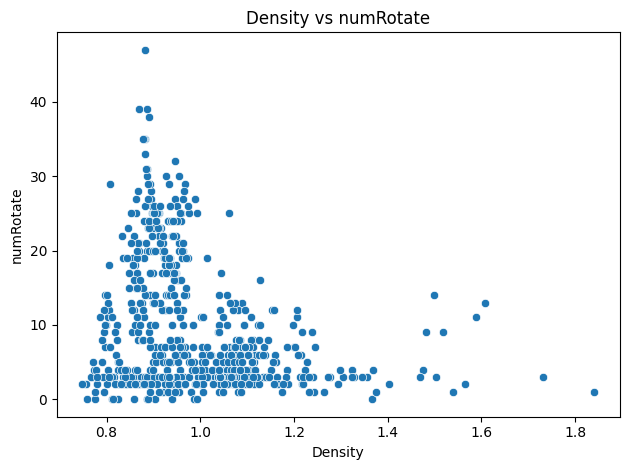

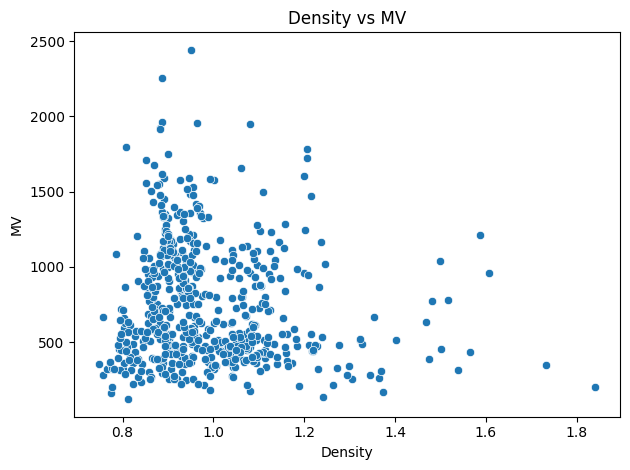

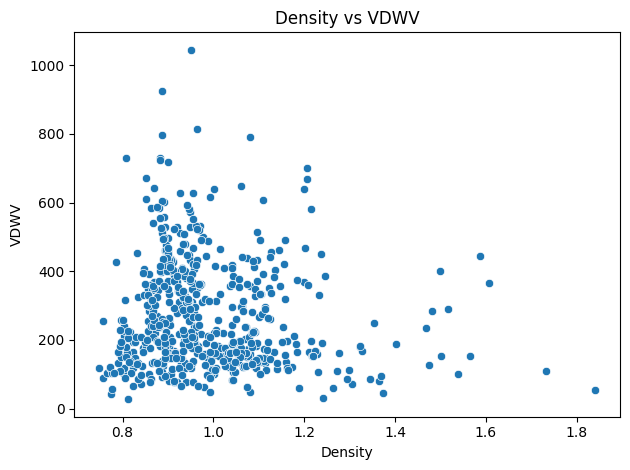

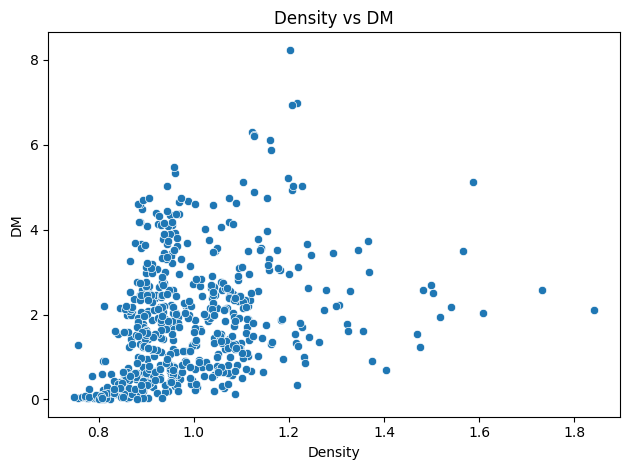

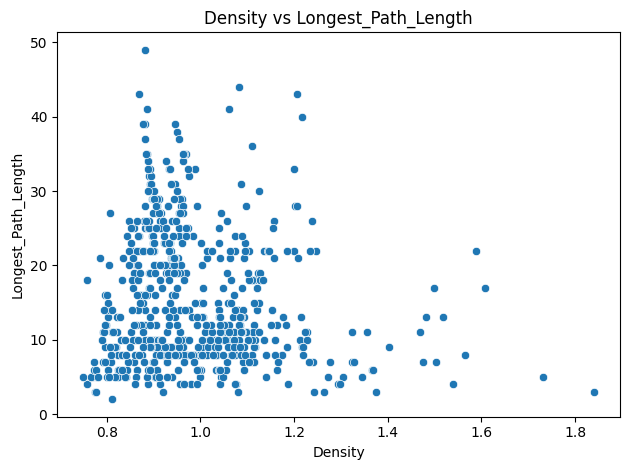

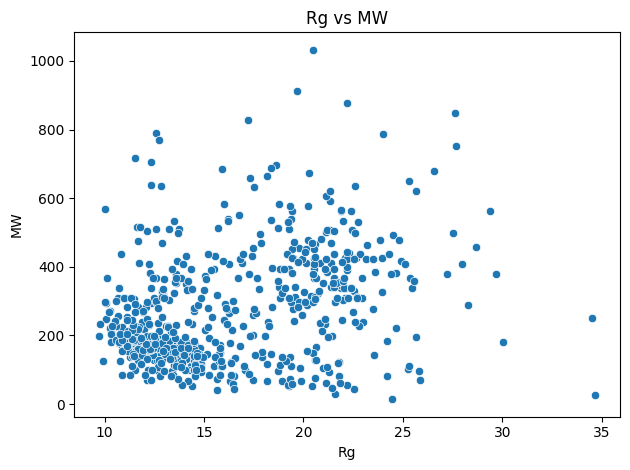

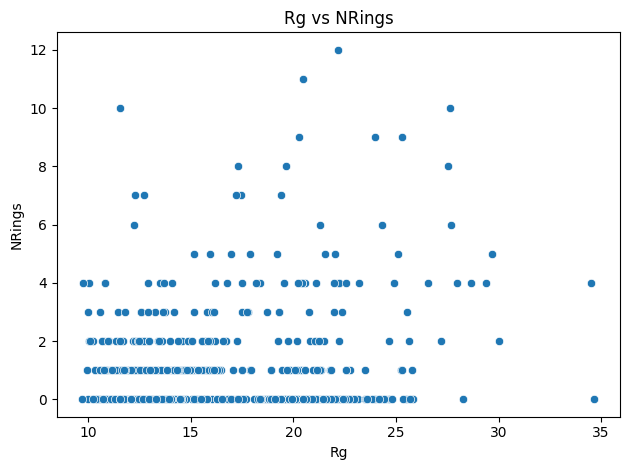

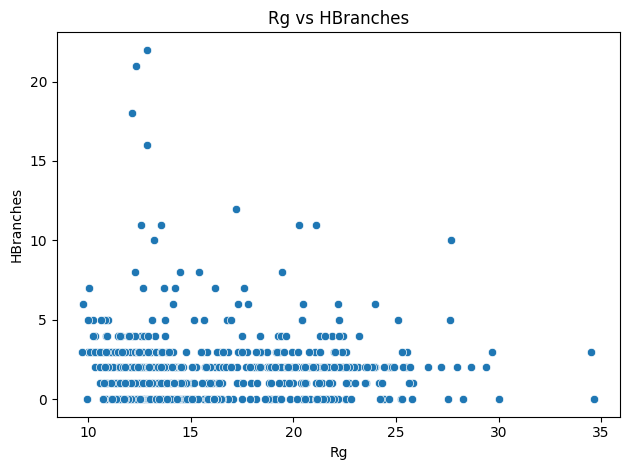

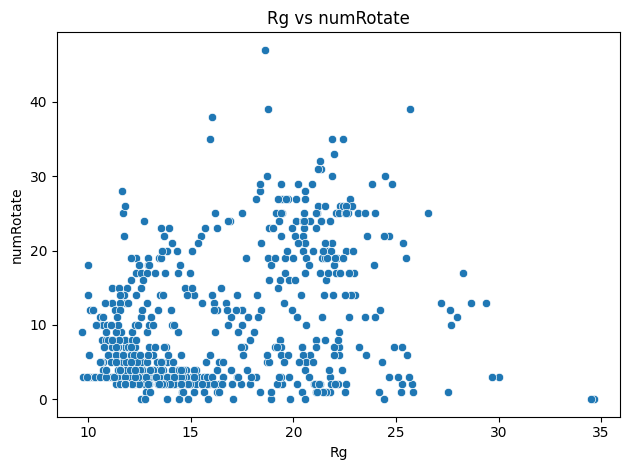

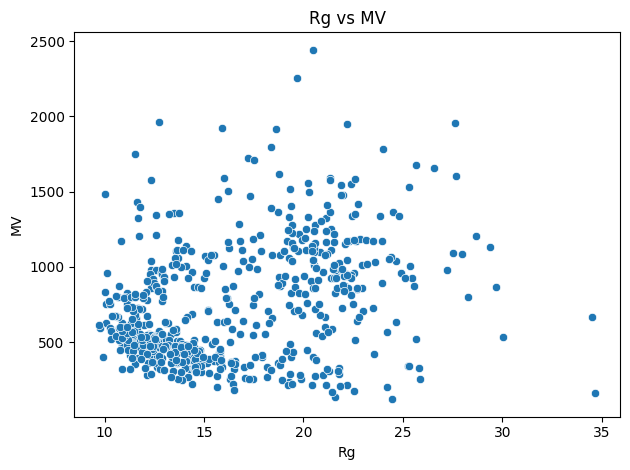

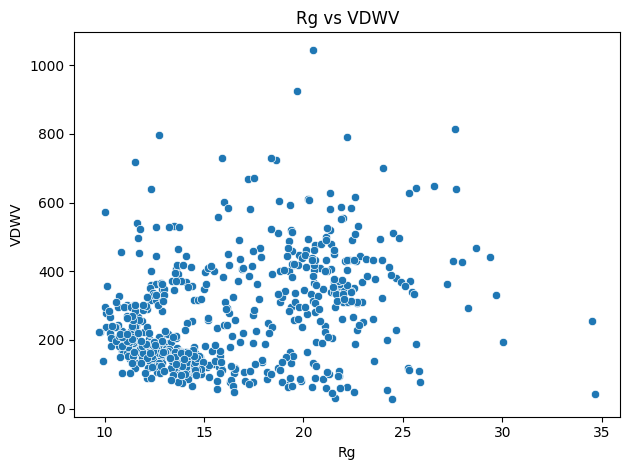

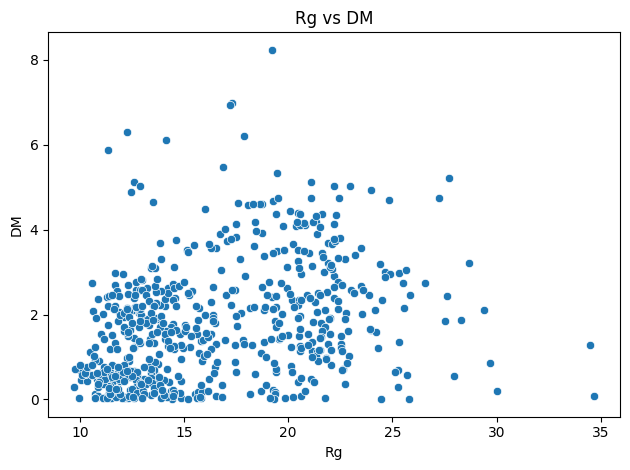

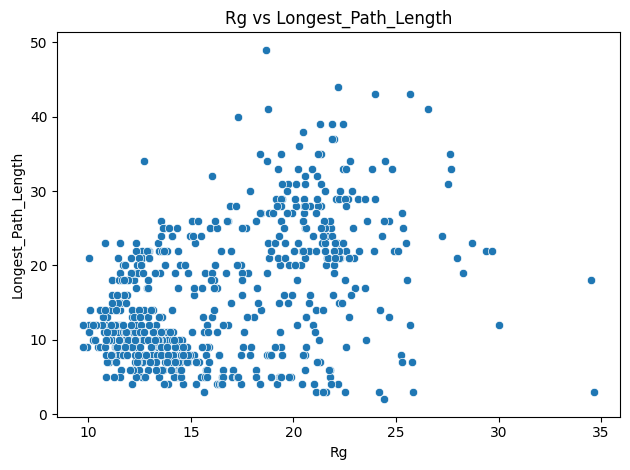

In [42]:
for target in targets:
    for feature in features:
        
        
        
        sns.scatterplot(df, x=target, y=feature)
        
        plt.title(f'{target} vs {feature}')
        plt.tight_layout()
        plt.show()
        


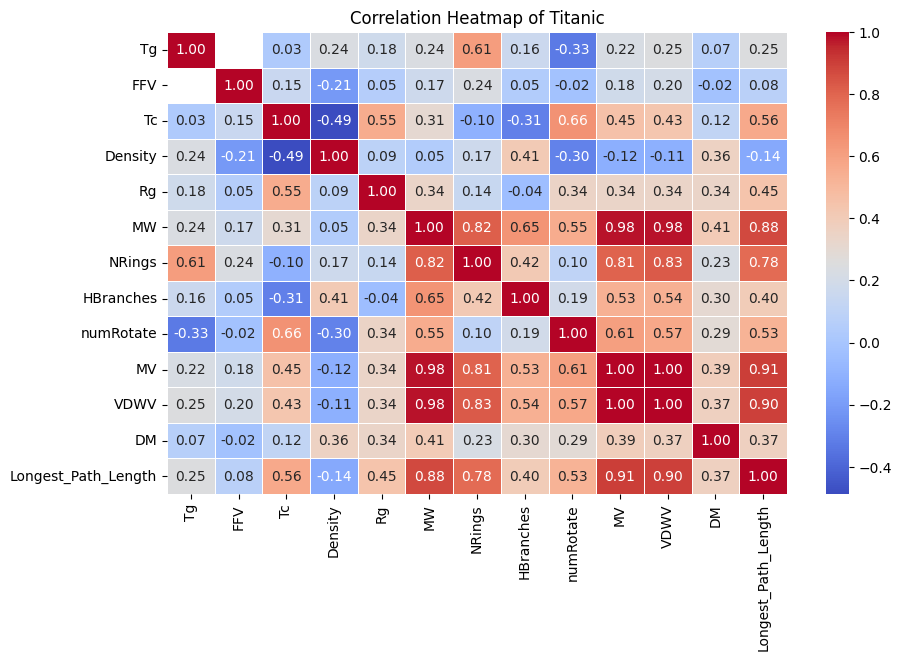

In [43]:
plt.figure(figsize=(10, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Titanic")
plt.show()

In [44]:
df.drop('MV', axis=1, inplace=True)
df_submission.drop('MV', axis=1, inplace=True)

features.remove('MV')

## Null Treatment

In [45]:
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 8968 entries, 0 to 8971
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tg                   557 non-null    float64
 1   FFV                  7890 non-null   float64
 2   Tc                   864 non-null    float64
 3   Density              612 non-null    float64
 4   Rg                   613 non-null    float64
 5   MW                   8968 non-null   float64
 6   NRings               8968 non-null   int64  
 7   HBranches            8968 non-null   int64  
 8   numRotate            8968 non-null   int64  
 9   VDWV                 8879 non-null   float64
 10  DM                   8855 non-null   float64
 11  Longest_Path_Length  8968 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 910.8 KB


Tg                     8411
FFV                    1078
Tc                     8104
Density                8356
Rg                     8355
MW                        0
NRings                    0
HBranches                 0
numRotate                 0
VDWV                     89
DM                      113
Longest_Path_Length       0
dtype: int64

We will use KNN to fill null values for VDWV and DM.

In [46]:
from sklearn.impute import KNNImputer

#KNN for train set
knn_imputer = KNNImputer(n_neighbors=5)

df[features] = pd.DataFrame(knn_imputer.fit_transform(df[features]),index=df.index)

#KNN for test set
knn_imputer = KNNImputer(n_neighbors=5)

df_submission[features] = pd.DataFrame(knn_imputer.fit_transform(df_submission[features]),index=df_submission.index)

## Model Development

In [47]:
X_train, X_val, y_train, y_val = train_test_split(
    df[features], df[targets], test_size=0.20, random_state=64
    )

In [48]:
X_train.shape, X_val.shape

((7174, 7), (1794, 7))

#### Preparation

def tune_model(X_train, y_train, model, param_grid):
    
    df_param = pd.DataFrame(columns= list(param_grid.keys()) + ["CV_score"], index= targets)
    
    Model = model(random_state=64)

    # Type of scoring used to compare parameter combinations
    scorer = metrics.make_scorer(metrics.root_mean_squared_error)

    # Calling RandomizedSearchCV
    bayes_opt_cv = BayesSearchCV(estimator=Model,
                                 search_spaces=param_grid,
                                 n_iter=20,
                                 n_jobs = -1,
                                 scoring=scorer,
                                 cv=5,
                                 random_state=64)

    for idx, name in enumerate(targets):
        
        print('Generating best parameters for the task:', name)
        y_col = y_train.iloc[:, idx]
        mask = ~np.isnan(y_col)
        
        if mask.sum() > 0:
            bayes_opt_cv_fit = bayes_opt_cv.fit(X_train[mask], y_col[mask])
        else:
            bayes_opt_cv_fit = np.nan
        
        #Inputs best parameters in dataframe
        for item in bayes_opt_cv_fit.best_params_.items():
            df_param.loc[name, item[0]] = item[1]
        df_param.loc[name, "CV_score"] = bayes_opt_cv_fit.best_score_
            
    return df_param
    
    

In [49]:
def tune_model(X_train, y_train, model, param_grid):
    
    df_param = pd.DataFrame(columns= list(param_grid.keys()) + ["CV_score"], index= targets)
    
    def get_trial_params(trial, param_grid):
        params = {}
        for key, value in param_grid.items():
            if value["type"] == "int":
                params[key] = trial.suggest_int(key, *value["args"])
            elif value["type"] == "float":
                params[key] = trial.suggest_float(key, *value["args"], log=value.get("log", False))
            elif value["type"] == "categorical":
                params[key] = trial.suggest_categorical(key, value["args"])
        return params
    
    
    def make_objective(X_train, y_train, model, param_grid):
        def objective(trial):
            params = get_trial_params(trial, param_grid)
            params["random_state"] = 64
            Model = model(**params)
            score = cross_val_score(
                Model,
                X_train,
                y_train,
                scoring="neg_mean_absolute_error",
                cv=5,
                n_jobs=-1
            ).mean()
            return score
        return objective

    for idx, name in enumerate(targets):
        
        # Calling Optuna
        study = optuna.create_study(direction="maximize")
        
        print('Generating best parameters for the task:', name)
        y_col = y_train.iloc[:, idx]
        mask = ~np.isnan(y_col)
        
        if mask.sum() > 0:
            study.optimize(make_objective(X_train[mask], y_col[mask], model, param_grid), n_trials=200)
        else:
            study = np.nan
        
        #Inputs best parameters in dataframe
        for item in study.best_params.items():
            df_param.loc[name, item[0]] = item[1]
        df_param.loc[name, "CV_score"] = -study.best_value
            
    return df_param
    

In [ ]:
def adj_r2_score(X_test, y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    k = X_test.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

def analyze_errors(X_test, y_test, y_pred):
    r2_per_task = {}
    adjr2_per_task = {}
    rmse_per_task = {}
    mae_per_task = {}
    
    #Finds errors per task
    for idx, name in enumerate(targets):
        print('Predicting for the task:', name)
        y_col = y_test.iloc[:, idx]
        mask = ~np.isnan(y_col)
        if mask.sum() > 0:
            r2_per_task[name] = r2_score(y_test[mask].iloc[:, idx].to_list(), y_pred[mask, idx]) # to compute R-squared
            adjr2_per_task[name] = adj_r2_score(X_test, y_test[mask].iloc[:, idx].to_list(), y_pred[mask, idx]) # to compute adjusted R-squared
            rmse_per_task[name] = np.sqrt(mean_squared_error(y_test[mask].iloc[:, idx].to_list(), y_pred[mask, idx])) # to compute RMSE
            mae_per_task[name] = mean_absolute_error(y_test[mask].iloc[:, idx].to_list(), y_pred[mask, idx]) # to compute MAE
        else:
            r2_per_task[name] = np.nan
            adjr2_per_task[name] = np.nan
            rmse_per_task[name] = np.nan
            mae_per_task[name] = np.nan


    # Compute overall errors across all tasks, skipping NaNs
    mask_all = ~np.isnan(y_test)
    y_true_flat = y_test.to_numpy()[mask_all]
    y_pred_flat = y_pred[mask_all]

    r2_per_task["Overall"] = r2_score(y_true_flat, y_pred_flat)  # to compute R-squared
    adjr2_per_task["Overall"] = adj_r2_score(X_test, y_true_flat, y_pred_flat)  # to compute adjusted R-squared
    rmse_per_task["Overall"] = np.sqrt(mean_squared_error(y_true_flat, y_pred_flat))  # to compute RMSE
    mae_per_task["Overall"] = mean_absolute_error(y_true_flat, y_pred_flat)  # to compute MAE
    
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse_per_task,
            "MAE": mae_per_task,
            "R-squared": r2_per_task,
            "Adj. R-squared": adjr2_per_task,
        },
        index=targets + ["Overall"],
    )
    
    return df_perf

#### Decision Tree Regressor

In [51]:
parameters = {'max_depth': {"type": "int", "args": (1, 15)},
              'min_samples_leaf': {"type": "int", "args": (1, 10)},
              'max_leaf_nodes' : {"type": "int", "args": (5, 15)},
              'min_impurity_decrease': {"type": "float", "args": (0, 0.1)}
             }


df_tuned = tune_model(X_train, y_train, DecisionTreeRegressor, param_grid=parameters)

df_tuned

Generating best parameters for the task: Tg
Generating best parameters for the task: FFV
Generating best parameters for the task: Tc
Generating best parameters for the task: Density
Generating best parameters for the task: Rg


,max_depth,min_samples_leaf,max_leaf_nodes,min_impurity_decrease,CV_score
Tg,6,1,13,0.034448,58.794761
FFV,10,1,8,0.069891,0.020827
Tc,5,8,8,0.000077,0.045439
Density,10,1,13,0.000244,0.070329
Rg,5,4,15,0.048764,2.642635


In [52]:
def dt_model(X_train, y_train, X_test, y_test):
    models = {}
    y_pred = np.zeros_like(y_test)

    # Train one random forest per task
    for idx, name in enumerate(targets):
        print('Training Random Tree regressor for the task:', name)
        y_col = y_train.iloc[:, idx]
        mask  = ~np.isnan(y_col)
        model = DecisionTreeRegressor(max_depth = df_tuned.loc[name, 'max_depth'],
                                      min_samples_leaf = df_tuned.loc[name, 'min_samples_leaf'],
                                      max_leaf_nodes = df_tuned.loc[name, 'max_leaf_nodes'],
                                      min_impurity_decrease= df_tuned.loc[name, 'min_impurity_decrease'],
                                      random_state=64)
        model.fit(X_train[mask], y_col[mask])
        models[name] = model
        # Predict on test set
        y_pred[:, idx] = model.predict(X_test)
        
    return models, y_pred

In [53]:
models1, y_pred = dt_model(X_train, y_train, X_val, y_val)

Training Random Tree regressor for the task: Tg
Training Random Tree regressor for the task: FFV
Training Random Tree regressor for the task: Tc
Training Random Tree regressor for the task: Density
Training Random Tree regressor for the task: Rg


In [54]:
analyze_errors(X_val, y_val, y_pred).T

Predicting for the task: Tg
Predicting for the task: FFV
Predicting for the task: Tc
Predicting for the task: Density
Predicting for the task: Rg


,Tg,FFV,Tc,Density,Rg,Overall
RMSE,75.792140,0.028084,0.061095,0.162848,4.030973,16.953366
MAE,59.738286,0.019609,0.046990,0.094627,2.774441,3.153950
R-squared,0.575623,-0.000153,0.509362,-0.056176,0.298029,0.765714
Adj. R-squared,0.573959,-0.004073,0.507439,-0.060315,0.295278,0.764796


#### Random Forest Regressor

In [55]:
parameters = param_grid = {
    'n_estimators': {"type": "int", "args": (100, 200)},
    'max_depth': {"type": "int", "args": (10, 20)},
    'min_samples_split': {"type": "int", "args": (2,6)},
    'min_samples_leaf': {"type": "int", "args": (1,3)},
    'bootstrap': {"type": "categorical", "args": [True, False]}
}


df_tuned = tune_model(X_train, y_train, RandomForestRegressor, param_grid=parameters)

df_tuned

Generating best parameters for the task: Tg
Generating best parameters for the task: FFV
Generating best parameters for the task: Tc
Generating best parameters for the task: Density
Generating best parameters for the task: Rg


,n_estimators,max_depth,min_samples_split,min_samples_leaf,bootstrap,CV_score
Tg,146,11,6,1,True,54.834841
FFV,200,20,2,1,True,0.012919
Tc,150,12,4,1,True,0.037722
Density,197,17,4,2,True,0.056894
Rg,102,13,3,2,True,2.513885


In [56]:
def rf_model(X_train, y_train, X_test, y_test, df_tuned):
    models = {}
    y_pred = np.zeros_like(y_test)

    # Train one random forest per task
    for idx, name in enumerate(targets):
        print('Training Random Tree regressor for the task:', name)
        y_col = y_train.iloc[:, idx]
        mask  = ~np.isnan(y_col)
        model = RandomForestRegressor(n_estimators=df_tuned.loc[name, 'n_estimators'],
                                      max_depth=df_tuned.loc[name, 'max_depth'],
                                      min_samples_split=df_tuned.loc[name, 'min_samples_split'],
                                      min_samples_leaf=df_tuned.loc[name, 'min_samples_leaf'],
                                      bootstrap=df_tuned.loc[name, 'bootstrap'],
                                      random_state=64)
        model.fit(X_train[mask], y_col[mask])
        models[name] = model
        # Predict on test set
        y_pred[:, idx] = model.predict(X_test)
        
    return models, y_pred

In [57]:
models2, y_pred = rf_model(X_train, y_train, X_val, y_val, df_tuned)

Training Random Tree regressor for the task: Tg
Training Random Tree regressor for the task: FFV
Training Random Tree regressor for the task: Tc
Training Random Tree regressor for the task: Density
Training Random Tree regressor for the task: Rg


In [58]:
analyze_errors(X_val, y_val, y_pred).T

Predicting for the task: Tg
Predicting for the task: FFV
Predicting for the task: Tc
Predicting for the task: Density
Predicting for the task: Rg


,Tg,FFV,Tc,Density,Rg,Overall
RMSE,66.342195,0.019997,0.052477,0.115370,3.733688,14.842284
MAE,52.296571,0.012430,0.037160,0.070610,2.591489,2.765275
R-squared,0.674850,0.492928,0.638025,0.469904,0.397752,0.820429
Adj. R-squared,0.673576,0.490940,0.636607,0.467826,0.395392,0.819725


#### Bagging Regressor

In [59]:
parameters = {'n_estimators': {"type": "int", "args": (100, 200)},
              'max_samples': {"type": "float", "args": (0.7, 1)},
              'max_features' : {"type": "float", "args": (0.7, 1)},
              'bootstrap': {"type": "categorical", "args": [True, False]}
             }


df_tuned = tune_model(X_train, y_train, BaggingRegressor, param_grid=parameters)

df_tuned

Generating best parameters for the task: Tg
Generating best parameters for the task: FFV
Generating best parameters for the task: Tc
Generating best parameters for the task: Density
Generating best parameters for the task: Rg


,n_estimators,max_samples,max_features,bootstrap,CV_score
Tg,191,0.80481,0.959635,True,54.763556
FFV,194,0.819677,0.960271,False,0.012808
Tc,155,0.811315,0.936263,True,0.037571
Density,183,0.853806,0.781126,False,0.054756
Rg,166,0.736626,0.736776,True,2.507948


In [60]:
def b_model(X_train, y_train, X_test, y_test):
    models = {}
    y_pred = np.zeros_like(y_test)

    # Train one random forest per task
    for idx, name in enumerate(targets):
        print('Training bagging regressor for the task:', name)
        y_col = y_train.iloc[:, idx]
        mask  = ~np.isnan(y_col)
        model = BaggingRegressor(n_estimators=df_tuned.loc[name, 'n_estimators'],
                                 max_samples= df_tuned.loc[name, 'max_samples'],
                                 max_features= df_tuned.loc[name, 'max_features'],
                                 bootstrap= df_tuned.loc[name, 'bootstrap'],
                                 random_state=64)
        model.fit(X_train[mask], y_col[mask])
        models[name] = model
        # Predict on test set
        y_pred[:, idx] = model.predict(X_test)
        
    return models, y_pred

In [61]:
models3, y_pred = b_model(X_train, y_train, X_val, y_val)

Training bagging regressor for the task: Tg
Training bagging regressor for the task: FFV
Training bagging regressor for the task: Tc
Training bagging regressor for the task: Density
Training bagging regressor for the task: Rg


In [62]:
analyze_errors(X_val, y_val, y_pred).T

Predicting for the task: Tg
Predicting for the task: FFV
Predicting for the task: Tc
Predicting for the task: Density
Predicting for the task: Rg


,Tg,FFV,Tc,Density,Rg,Overall
RMSE,67.106981,0.019792,0.052005,0.108683,3.701850,15.012369
MAE,53.115182,0.012055,0.037069,0.065020,2.653668,2.808875
R-squared,0.667310,0.503293,0.644501,0.529571,0.407979,0.816290
Adj. R-squared,0.666006,0.501346,0.643108,0.527728,0.405659,0.815570


#### Gradient Boosting Regressor

In [63]:
parameters = {'n_estimators': {"type": "int", "args": (100, 200)},
              'learning_rate': {"type": "float", "args": (0.001, 0.01)},
              'max_depth': {"type": "int", "args": (2, 10)},
              'min_samples_split': {"type": "int", "args": (2, 20)},
              'min_samples_leaf': {"type": "int", "args": (2, 20)},
              'subsample' : {"type": "float", "args": (0.7, 1)},
              'max_features': {"type": "categorical", "args": ["sqrt", "log2", None]}
             }


df_tuned = tune_model(X_train, y_train, GradientBoostingRegressor, param_grid=parameters)

df_tuned

Generating best parameters for the task: Tg
Generating best parameters for the task: FFV
Generating best parameters for the task: Tc
Generating best parameters for the task: Density
Generating best parameters for the task: Rg


,n_estimators,learning_rate,max_depth,min_samples_split,min_samples_leaf,subsample,max_features,CV_score
Tg,200,0.009974,10,19,2,0.874641,None,56.749158
FFV,197,0.009952,10,8,2,0.82136,sqrt,0.01444
Tc,200,0.009825,10,2,2,0.930067,log2,0.039479
Density,198,0.009993,9,9,3,0.881811,None,0.059934
Rg,197,0.009839,10,3,4,0.706616,log2,2.587555


In [64]:
def gb_model(X_train, y_train, X_test, y_test):
    models = {}
    y_pred = np.zeros_like(y_test)

    # Train one random forest per task
    for idx, name in enumerate(targets):
        print('Training gradient boosting regressor for the task:', name)
        y_col = y_train.iloc[:, idx]
        mask  = ~np.isnan(y_col)
        model = GradientBoostingRegressor(n_estimators= df_tuned.loc[name, 'n_estimators'],
                                          learning_rate= df_tuned.loc[name, 'learning_rate'],
                                          max_depth= df_tuned.loc[name, 'max_depth'],
                                          min_samples_split= df_tuned.loc[name, 'min_samples_split'],
                                          subsample= df_tuned.loc[name, 'subsample'],
                                          max_features= df_tuned.loc[name, 'max_features'],
                                          random_state=64)
        model.fit(X_train[mask], y_col[mask])
        models[name] = model
        # Predict on test set
        y_pred[:, idx] = model.predict(X_test)
        
    return models, y_pred

In [65]:
models4, y_pred = gb_model(X_train, y_train, X_val, y_val)

Training gradient boosting regressor for the task: Tg
Training gradient boosting regressor for the task: FFV
Training gradient boosting regressor for the task: Tc
Training gradient boosting regressor for the task: Density
Training gradient boosting regressor for the task: Rg


In [66]:
analyze_errors(X_val, y_val, y_pred).T

Predicting for the task: Tg
Predicting for the task: FFV
Predicting for the task: Tc
Predicting for the task: Density
Predicting for the task: Rg


,Tg,FFV,Tc,Density,Rg,Overall
RMSE,65.698603,0.020798,0.052957,0.117403,3.746094,14.698967
MAE,51.865802,0.013588,0.036934,0.074181,2.733910,2.752570
R-squared,0.681128,0.451511,0.631369,0.451059,0.393743,0.823880
Adj. R-squared,0.679878,0.449361,0.629924,0.448907,0.391367,0.823190


#### Ada Boost Regressor

In [67]:
parameters = {'n_estimators': {"type": "int", "args": (100, 200)},
              'learning_rate': {"type": "float", "args": (0.001, 0.01)},
              'loss': {"type": "categorical", "args": ["linear", "square", "exponential"]}
             }


df_tuned = tune_model(X_train, y_train, AdaBoostRegressor, param_grid=parameters)

df_tuned

Generating best parameters for the task: Tg
Generating best parameters for the task: FFV
Generating best parameters for the task: Tc
Generating best parameters for the task: Density
Generating best parameters for the task: Rg


,n_estimators,learning_rate,loss,CV_score
Tg,172,0.008366,linear,57.412949
FFV,110,0.001909,exponential,0.018691
Tc,108,0.002135,exponential,0.043129
Density,123,0.005888,square,0.068279
Rg,166,0.001168,exponential,2.732178


In [68]:
def ab_model(X_train, y_train, X_test, y_test):
    models = {}
    y_pred = np.zeros_like(y_test)

    # Train one random forest per task
    for idx, name in enumerate(targets):
        print('Training Ada boost regressor for the task:', name)
        y_col = y_train.iloc[:, idx]
        mask  = ~np.isnan(y_col)
        model = AdaBoostRegressor(n_estimators=df_tuned.loc[name, 'n_estimators'],
                                  learning_rate = df_tuned.loc[name, 'learning_rate'],
                                  loss = df_tuned.loc[name, 'loss'],
                                  random_state=64)
        model.fit(X_train[mask], y_col[mask])
        models[name] = model
        # Predict on test set
        y_pred[:, idx] = model.predict(X_test)
        
    return models, y_pred

In [69]:
models5, y_pred = ab_model(X_train, y_train, X_val, y_val)

Training Ada boost regressor for the task: Tg
Training Ada boost regressor for the task: FFV
Training Ada boost regressor for the task: Tc
Training Ada boost regressor for the task: Density
Training Ada boost regressor for the task: Rg


In [70]:
analyze_errors(X_val, y_val, y_pred).T

Predicting for the task: Tg
Predicting for the task: FFV
Predicting for the task: Tc
Predicting for the task: Density
Predicting for the task: Rg


,Tg,FFV,Tc,Density,Rg,Overall
RMSE,67.179402,0.026620,0.060654,0.124219,4.129568,15.034573
MAE,52.753991,0.018212,0.044971,0.075430,2.956821,2.813175
R-squared,0.666592,0.101415,0.516428,0.385470,0.263270,0.815746
Adj. R-squared,0.665285,0.097894,0.514533,0.383061,0.260382,0.815024


#### Stacking Regressor

In [71]:
def s_model(X_train, y_train, X_test, y_test):
    models = {}
    y_pred = np.zeros_like(y_test)

    estimators = [
    ('lr', RidgeCV()),
    ('svr', LinearSVR(random_state=64))
    ]

    # Train one random forest per task
    for idx, name in enumerate(targets):
        print('Training stacking regressor for the task:', name)
        y_col = y_train.iloc[:, idx]
        mask  = ~np.isnan(y_col)
        model = StackingRegressor(estimators=estimators,
                                  final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=64))
        model.fit(X_train[mask], y_col[mask])
        models[name] = model
        # Predict on test set
        y_pred[:, idx] = model.predict(X_test)
        
    return models, y_pred

In [72]:
models6, y_pred = s_model(X_train, y_train, X_val, y_val)

Training stacking regressor for the task: Tg
Training stacking regressor for the task: FFV


C:\Users\Silas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Silas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Silas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Silas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear 

Training stacking regressor for the task: Tc
Training stacking regressor for the task: Density
Training stacking regressor for the task: Rg


C:\Users\Silas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Silas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Silas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Silas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear 

In [73]:
analyze_errors(X_val, y_val, y_pred).T

Predicting for the task: Tg
Predicting for the task: FFV
Predicting for the task: Tc
Predicting for the task: Density
Predicting for the task: Rg


,Tg,FFV,Tc,Density,Rg,Overall
RMSE,86.733076,0.030915,0.070999,0.103752,4.688803,19.401612
MAE,67.862792,0.023018,0.057693,0.069723,3.847595,3.619422
R-squared,0.444258,-0.211945,0.337402,0.571289,0.050220,0.693162
Adj. R-squared,0.442080,-0.216695,0.334805,0.569609,0.046497,0.691959


#### XGBoost Regressor

In [74]:
parameters = {'n_estimators': {"type": "int", "args": (100, 200)},
              'learning_rate': {"type": "float", "args": (0.001, 0.01)},
              'max_depth': {"type": "int", "args": (2, 10)},
              'min_child_weight': {"type": "int", "args": (2, 20)},
              'gamma': {"type": "float", "args": (0, 2)},
              'reg_alpha': {"type": "float", "args": (0, 0.5)},
              'reg_lambda': {"type": "float", "args": (0, 0.5)},
              'subsample' : {"type": "float", "args": (0.7, 1)},
              'colsample_bytree': {"type": "float", "args": (0.7, 1)},
              'tree_method': {"type": "categorical", "args": ["auto", "hist", "exact"]},
              'booster': {"type": "categorical", "args": ["gbtree", "dart"]}
             }

df_tuned = tune_model(X_train, y_train, XGBRegressor, param_grid=parameters)

df_tuned

Generating best parameters for the task: Tg
Generating best parameters for the task: FFV
Generating best parameters for the task: Tc
Generating best parameters for the task: Density
Generating best parameters for the task: Rg


,n_estimators,learning_rate,max_depth,min_child_weight,gamma,reg_alpha,reg_lambda,subsample,colsample_bytree,tree_method,booster,CV_score
Tg,194,0.009983,8,2,1.395535,0.339049,0.068145,0.838919,0.859313,auto,gbtree,56.417345
FFV,197,0.008797,9,20,0.000483,0.095554,0.339655,0.849776,0.97301,exact,gbtree,0.015583
Tc,200,0.008473,7,5,0.003691,0.018936,0.044655,0.718626,0.848033,hist,dart,0.041379
Density,194,0.009979,5,15,0.00103,0.019974,0.151389,0.843621,0.865007,exact,dart,0.065913
Rg,200,0.009653,10,3,1.486236,0.45496,0.453819,0.898616,0.879371,exact,dart,2.576628


In [75]:
def xgb_model(X_train, y_train, X_test, y_test):
    models = {}
    y_pred = np.zeros_like(y_test)

    # Train one random forest per task
    for idx, name in enumerate(targets):
        print('Training XGB regressor for the task:', name)
        y_col = y_train.iloc[:, idx]
        mask  = ~np.isnan(y_col)
        model = XGBRegressor(n_estimators= df_tuned.loc[name, 'n_estimators'],
                             learning_rate = df_tuned.loc[name, 'learning_rate'],
                             max_depth = df_tuned.loc[name, 'max_depth'],
                             min_child_weight = df_tuned.loc[name, 'min_child_weight'],
                             gamma = df_tuned.loc[name, 'gamma'],
                             reg_alpha =df_tuned.loc[name, 'reg_alpha'],
                             reg_lambda = df_tuned.loc[name, 'reg_lambda'],
                             subsample = df_tuned.loc[name, 'subsample'],
                             colsample_bytree = df_tuned.loc[name, 'colsample_bytree'],
                             tree_method =df_tuned.loc[name, 'tree_method'],
                             booster = df_tuned.loc[name, 'booster'],
                             random_state=64)
        model.fit(X_train[mask], y_col[mask])
        models[name] = model
        # Predict on test set
        y_pred[:, idx] = model.predict(X_test)
        
    return models, y_pred

In [76]:
models7, y_pred = xgb_model(X_train, y_train, X_val, y_val)

Training XGB regressor for the task: Tg
Training XGB regressor for the task: FFV
Training XGB regressor for the task: Tc
Training XGB regressor for the task: Density
Training XGB regressor for the task: Rg


In [77]:
analyze_errors(X_val, y_val, y_pred).T

Predicting for the task: Tg
Predicting for the task: FFV
Predicting for the task: Tc
Predicting for the task: Density
Predicting for the task: Rg


,Tg,FFV,Tc,Density,Rg,Overall
RMSE,69.673872,0.022616,0.051937,0.114673,3.742898,15.585279
MAE,55.941274,0.014631,0.039173,0.073290,2.706176,2.955272
R-squared,0.641372,0.351401,0.645427,0.476287,0.394777,0.802001
Adj. R-squared,0.639967,0.348859,0.644037,0.474235,0.392405,0.801225


## Model Prediction

In [78]:
X_test = df_submission[features]

df_submission[targets] = 0.0

In [79]:
y_test_pred= np.zeros_like(df_submission[targets])
y_test_pred = y_test_pred.astype(float)

for idx, name in enumerate(targets):
    # Predict on test set
    y_test_pred[:, idx] = models2[name].predict(X_test)

In [80]:
df_submission = df_submission[['id', 'Tg', 'FFV', 'Tc', 'Density', 'Rg']]

df_submission[targets] = y_test_pred

In [81]:
df_submission.to_csv('submission.csv', index=False)